# LEAD SCORING CASE STUDY

# PROBLEM STATEMENT

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

# Goals of the Case Study



There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.



There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# Reading and Understanding the Data
    
    
Let's start with the following steps:

Importing data using the pandas library Understanding the structure of the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [3]:
# Read the given data file and understanding the data

lead = pd.read_csv('C:/Users/drric/OneDrive/Desktop/Leads.csv')

In [4]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [6]:
lead.shape

(9240, 37)

In [7]:
lead.size

341880

In [8]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Exploratory Data Analysis :


Lets deal with missing values in the dataset :

In [10]:
# Since it is stated that 'Select' values are missing entries we will be replacing 'Select' value with Nan in the Dataset
lead = lead.replace('Select',np.nan)

In [11]:
## check for missing values


lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
#checking percentage of null values in each column

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [13]:
# Firstly let remove the unnecessary columns with very high missing values thus we drop columns with more than 40% missing values

lead = lead.drop('Lead Quality', axis=1)
lead = lead.drop('Asymmetrique Activity Index', axis=1)
lead = lead.drop('Asymmetrique Profile Index', axis=1)
lead = lead.drop('Asymmetrique Activity Score', axis=1)
lead = lead.drop('Asymmetrique Profile Score', axis=1)
lead = lead.drop('How did you hear about X Education', axis=1)
lead = lead.drop('Lead Profile', axis=1)

In [14]:
#Re-checking percentage of null values in each column


round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#Further, modifiying columns having missing values less than 5% with mode values of the respective columns

In [15]:
lead['Lead Source'].value_counts(dropna = False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [16]:
lead['Lead Source'] = lead['Lead Source'].fillna('Google')

In [17]:
lead['TotalVisits'] = lead['TotalVisits'].fillna(0.0)

In [18]:
lead['Page Views Per Visit'].value_counts(dropna = False)

Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: count, Length: 115, dtype: int64

In [19]:
lead['Page Views Per Visit'] = lead['Page Views Per Visit'].fillna(0.00)


In [20]:
lead['Last Activity'].value_counts(dropna = False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [21]:
lead['Last Activity'] = lead['Last Activity'].fillna('Email Opened')

In [22]:
#Re-checking for the missing values :

round(100*(lead.isnull().sum()/len(lead)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [23]:
# Lets deal with columns with missing values % ranging between 6% to 39% 
# We will have to look each of them individually to understand better 

In [24]:
#checking value counts of Country column

lead['Country'].value_counts(normalize = True)

Country
India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vi

<Axes: xlabel='Country', ylabel='count'>

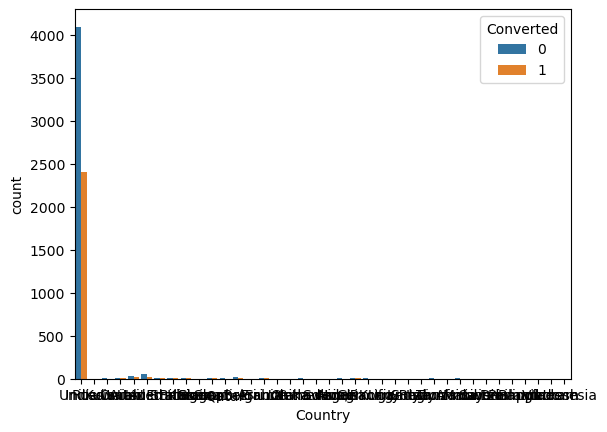

In [25]:
sns.countplot(x = "Country", hue = "Converted", data = lead)

Since India is the most common occurence with 95.7% thus we can exclue this column as the representation will always be higher without holding much relevance to target variable.

In [26]:
# Dropping Country column :

lead = lead.drop('Country', axis=1)

In [27]:
#checking value counts of "City" column

lead['City'].value_counts(normalize = True)

City
Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: proportion, dtype: float64

<Axes: xlabel='City', ylabel='count'>

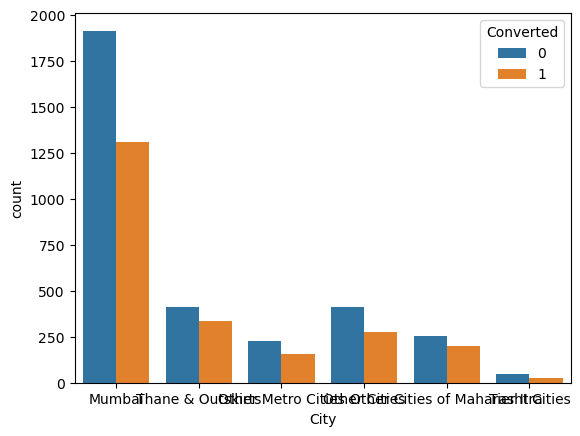

In [28]:
sns.countplot(x = "City", hue = "Converted", data = lead)

In [29]:
## Unknown values for City can be imputed as Mumbai as Mumbai holds the higher representations

lead['City'] = lead['City'].fillna(lead['City'].mode()[0])
lead['City'] = lead['City'].replace("Select", "Mumbai")

In [30]:
#Re-checking value counts of "City" column

lead['City'].value_counts(normalize = True)

City
Mumbai                         0.745779
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: proportion, dtype: float64

In [31]:
#checking value counts of Specialization column

lead['Specialization'].value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [32]:
# Since the count of  is missing values higher than all other values we will replace missing with new category 'Unknown'
lead['Specialization'] = lead['Specialization'].replace(np.NaN,'Unknown')


<Axes: xlabel='Specialization', ylabel='count'>

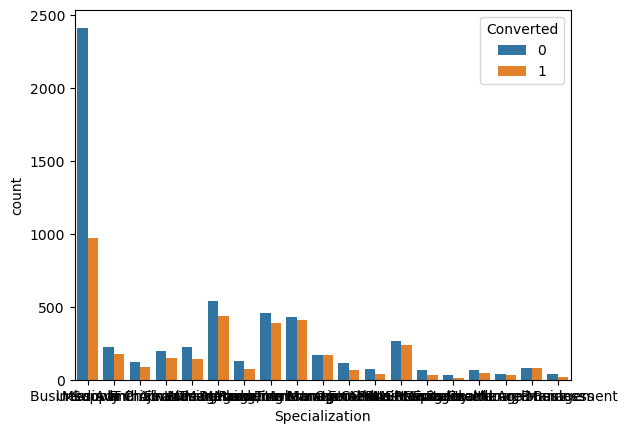

In [33]:
sns.countplot(x = "Specialization", hue = "Converted", data = lead)


In [34]:
#consolidating all the Management Specializations because they show similar trends

lead['Specialization'] = lead['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')

In [35]:
#checking value counts of Specialization column

lead['Specialization'].value_counts(dropna=False)

Specialization
Management_Specializations           4253
Unknown                              3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [36]:
#Now checking 'What is your current occupation' column :

lead['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [37]:
#changing Nan values with mode "Unemployed"

lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

In [38]:
#Re-checking count of values
lead['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

<Axes: xlabel='What is your current occupation', ylabel='count'>

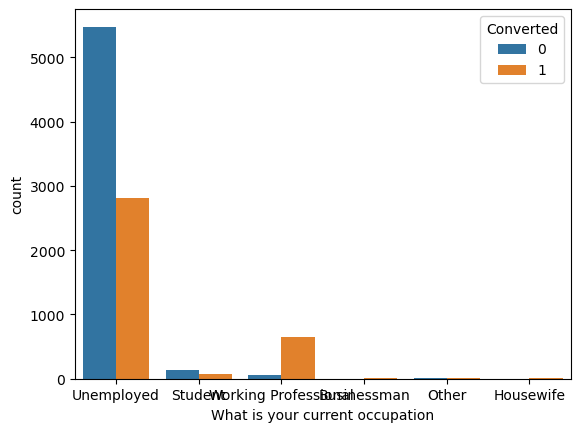

In [39]:
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead)


Above graph shows that the maximum values for converted leads is higher countwise in unemployed category, but the ratio of converted leads is higher in Working Professionals

In [40]:
#checking value counts

lead['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [41]:
#replacing Nan values with Mode "Better Career Prospects"

lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan,"Other")

In [42]:
#Re-checking percentage of null values in each column

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [43]:
#checking value counts of Tag variable 

lead['Tags'].value_counts(dropna=False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

In [44]:
#replacing Nan values with "Not Specified"
lead['Tags'] = lead['Tags'].replace(np.nan,'Unknown')

In [45]:
#checking value counts of Tag variable
lead['Tags'].value_counts(dropna=False)

Tags
Unknown                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

In [46]:
# For better undertstanding of the 'Tags' column , we will catgeorise them further :


lead['Tags'] = lead['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

lead['Tags'] = lead['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')


In [47]:
#Re-checking percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [48]:
#checking value counts of Lead Source column

lead['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [49]:
#replacing missing Values and combining low frequency values

lead['Lead Source'] = lead['Lead Source'].replace(np.nan,'Others')
lead['Lead Source'] = lead['Lead Source'].replace('google','Google')
lead['Lead Source'] = lead['Lead Source'].replace('Facebook','Social Media')
lead['Lead Source'] = lead['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')   

In [50]:
#checking value counts of Lead Source column

lead['Lead Source'].value_counts(dropna=False)

Lead Source
Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                21
Name: count, dtype: int64

In [51]:
#Re-checking percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

#THERE ARE NO MORE MISSING VALUES IN THE DATA

#Check and drop values with single unique numbers. 



In [52]:
lead.nunique()


Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                         9
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Specialization                                     11
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [53]:
# Let us Drop unique valued columns
lead= lead.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

#CHECK DUPLICATE VALUES FOR ID COLUMNS WHICH CAN BE IRRELEVANT

In [54]:
#check for duplicates
sum(lead.duplicated(subset = 'Prospect ID')) == 0

True

In [55]:
#check for duplicates
sum(lead.duplicated(subset = 'Lead Number')) == 0

True

In [56]:
#dropping Lead Number and Prospect ID since they have all unique values

lead = lead.drop(['Prospect ID', 'Lead Number'], axis = 1)

# UNIVARIATE & BIVARIATE DATA ANALYSIS

In [57]:
lead.shape

(9240, 22)

In [58]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unknown,...,No,No,No,No,No,No,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unknown,...,No,No,No,No,No,No,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unknown,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [59]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Specialization                                 9240 

In [60]:
lead.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


#There are outliers in the dataset but these could be directly related to the convertion of leads, thus we will retain then and analyse them with respect to categorical variable 'Conversion'

#DERIVE CONVERSION RATE :

In [61]:
conversion = (sum(lead['Converted'])/len(lead['Converted'].index))*100

conversion


38.53896103896104

#Column 'Lead Origin'

<Axes: xlabel='Lead Origin', ylabel='count'>

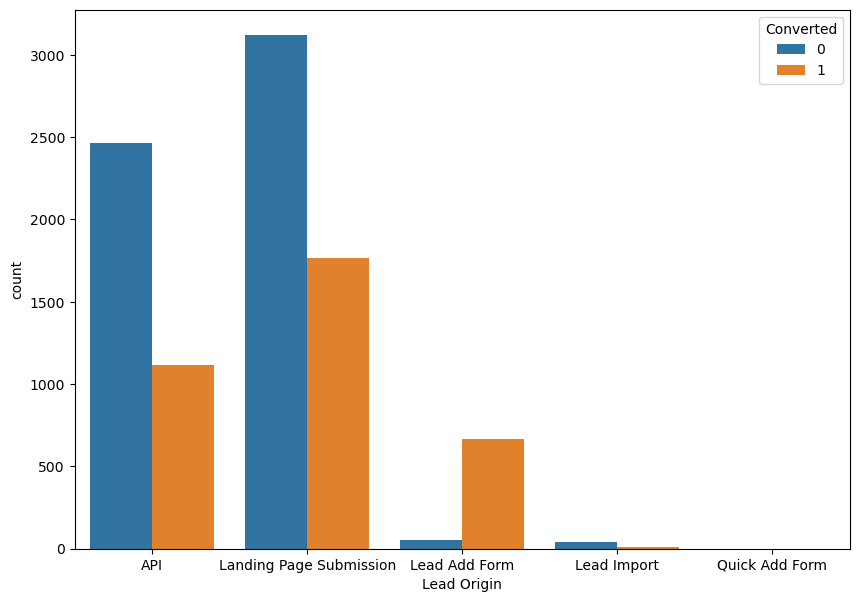

In [62]:
#visualizing count of Variables based on Converted value
plt.figure(figsize=(10,7))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead)


In [63]:
lead['Lead Origin'].value_counts(normalize=True)

Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: proportion, dtype: float64

#Interpretation :   

Absolute counts of leads for API (39%) & LAnding Page Submission (53%) is very high  However, the Lead add form Lead origin has very high conversion rate 

To improve the target conversion goal, we must increase lead count for Lead Add Form Lead Origin and we must increase conversion rate for API & Landing Page Submission

#Column 'Lead Source'

In [64]:
lead['Lead Source'].value_counts(normalize=True)

Lead Source
Google              0.314827
Direct Traffic      0.275216
Olark Chat          0.189935
Organic Search      0.124892
Reference           0.057792
Welingak Website    0.015368
Referral Sites      0.013528
Social Media        0.006169
Others              0.002273
Name: proportion, dtype: float64

<Axes: xlabel='Lead Source', ylabel='count'>

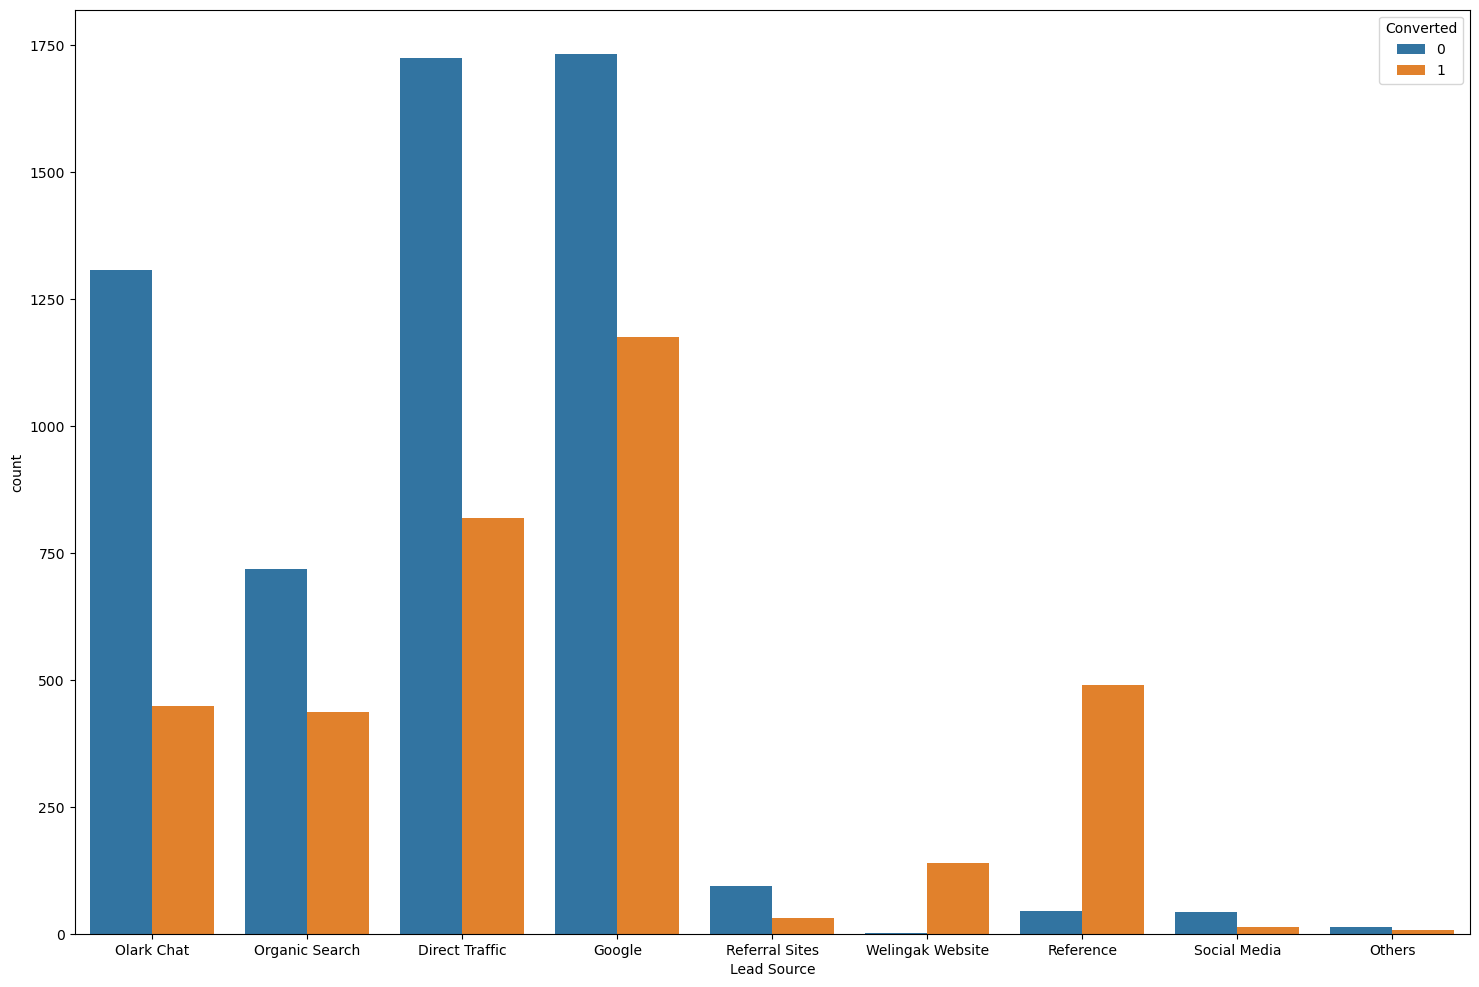

In [65]:
#visualizing count of Variables based on Converted value
plt.figure(figsize=(18,12))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead)


#Interpretation :  


The conversion rate for welingkar website & references is very high 
Followed by good conversion rate for Google & Organic search
Absolute counts for Google and Direct Traffic are high

In [66]:
# Column 'Do Not Email'

In [67]:
lead['Do Not Email'].value_counts(normalize=True)

Do Not Email
No     0.920563
Yes    0.079437
Name: proportion, dtype: float64

In [68]:
# Column 'Do Not Call' 

In [69]:
lead['Do Not Call'].value_counts(normalize=True)

Do Not Call
No     0.999784
Yes    0.000216
Name: proportion, dtype: float64

In [70]:
# Dropping column 'Do Not Call' as since 99.9% is single value hence not significant

In [71]:
lead = lead.drop(['Do Not Call'], axis = 1)

In [72]:
#Column 'Last Activity' :

In [73]:
lead['Last Activity'].value_counts(normalize=True)

Last Activity
Email Opened                    0.383117
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Received                  0.000216
Email Marked Spam               0.000216
Visited Booth in Tradeshow      0.000108
Resubscribed to emails          0.000108
Name: proportion, dtype: float64

In [74]:
#replacing Nan Values and combining low frequency values

lead['Last Activity'] = lead['Last Activity'].replace(np.nan,'Others')
lead['Last Activity'] = lead['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

<Axes: xlabel='Last Activity', ylabel='count'>

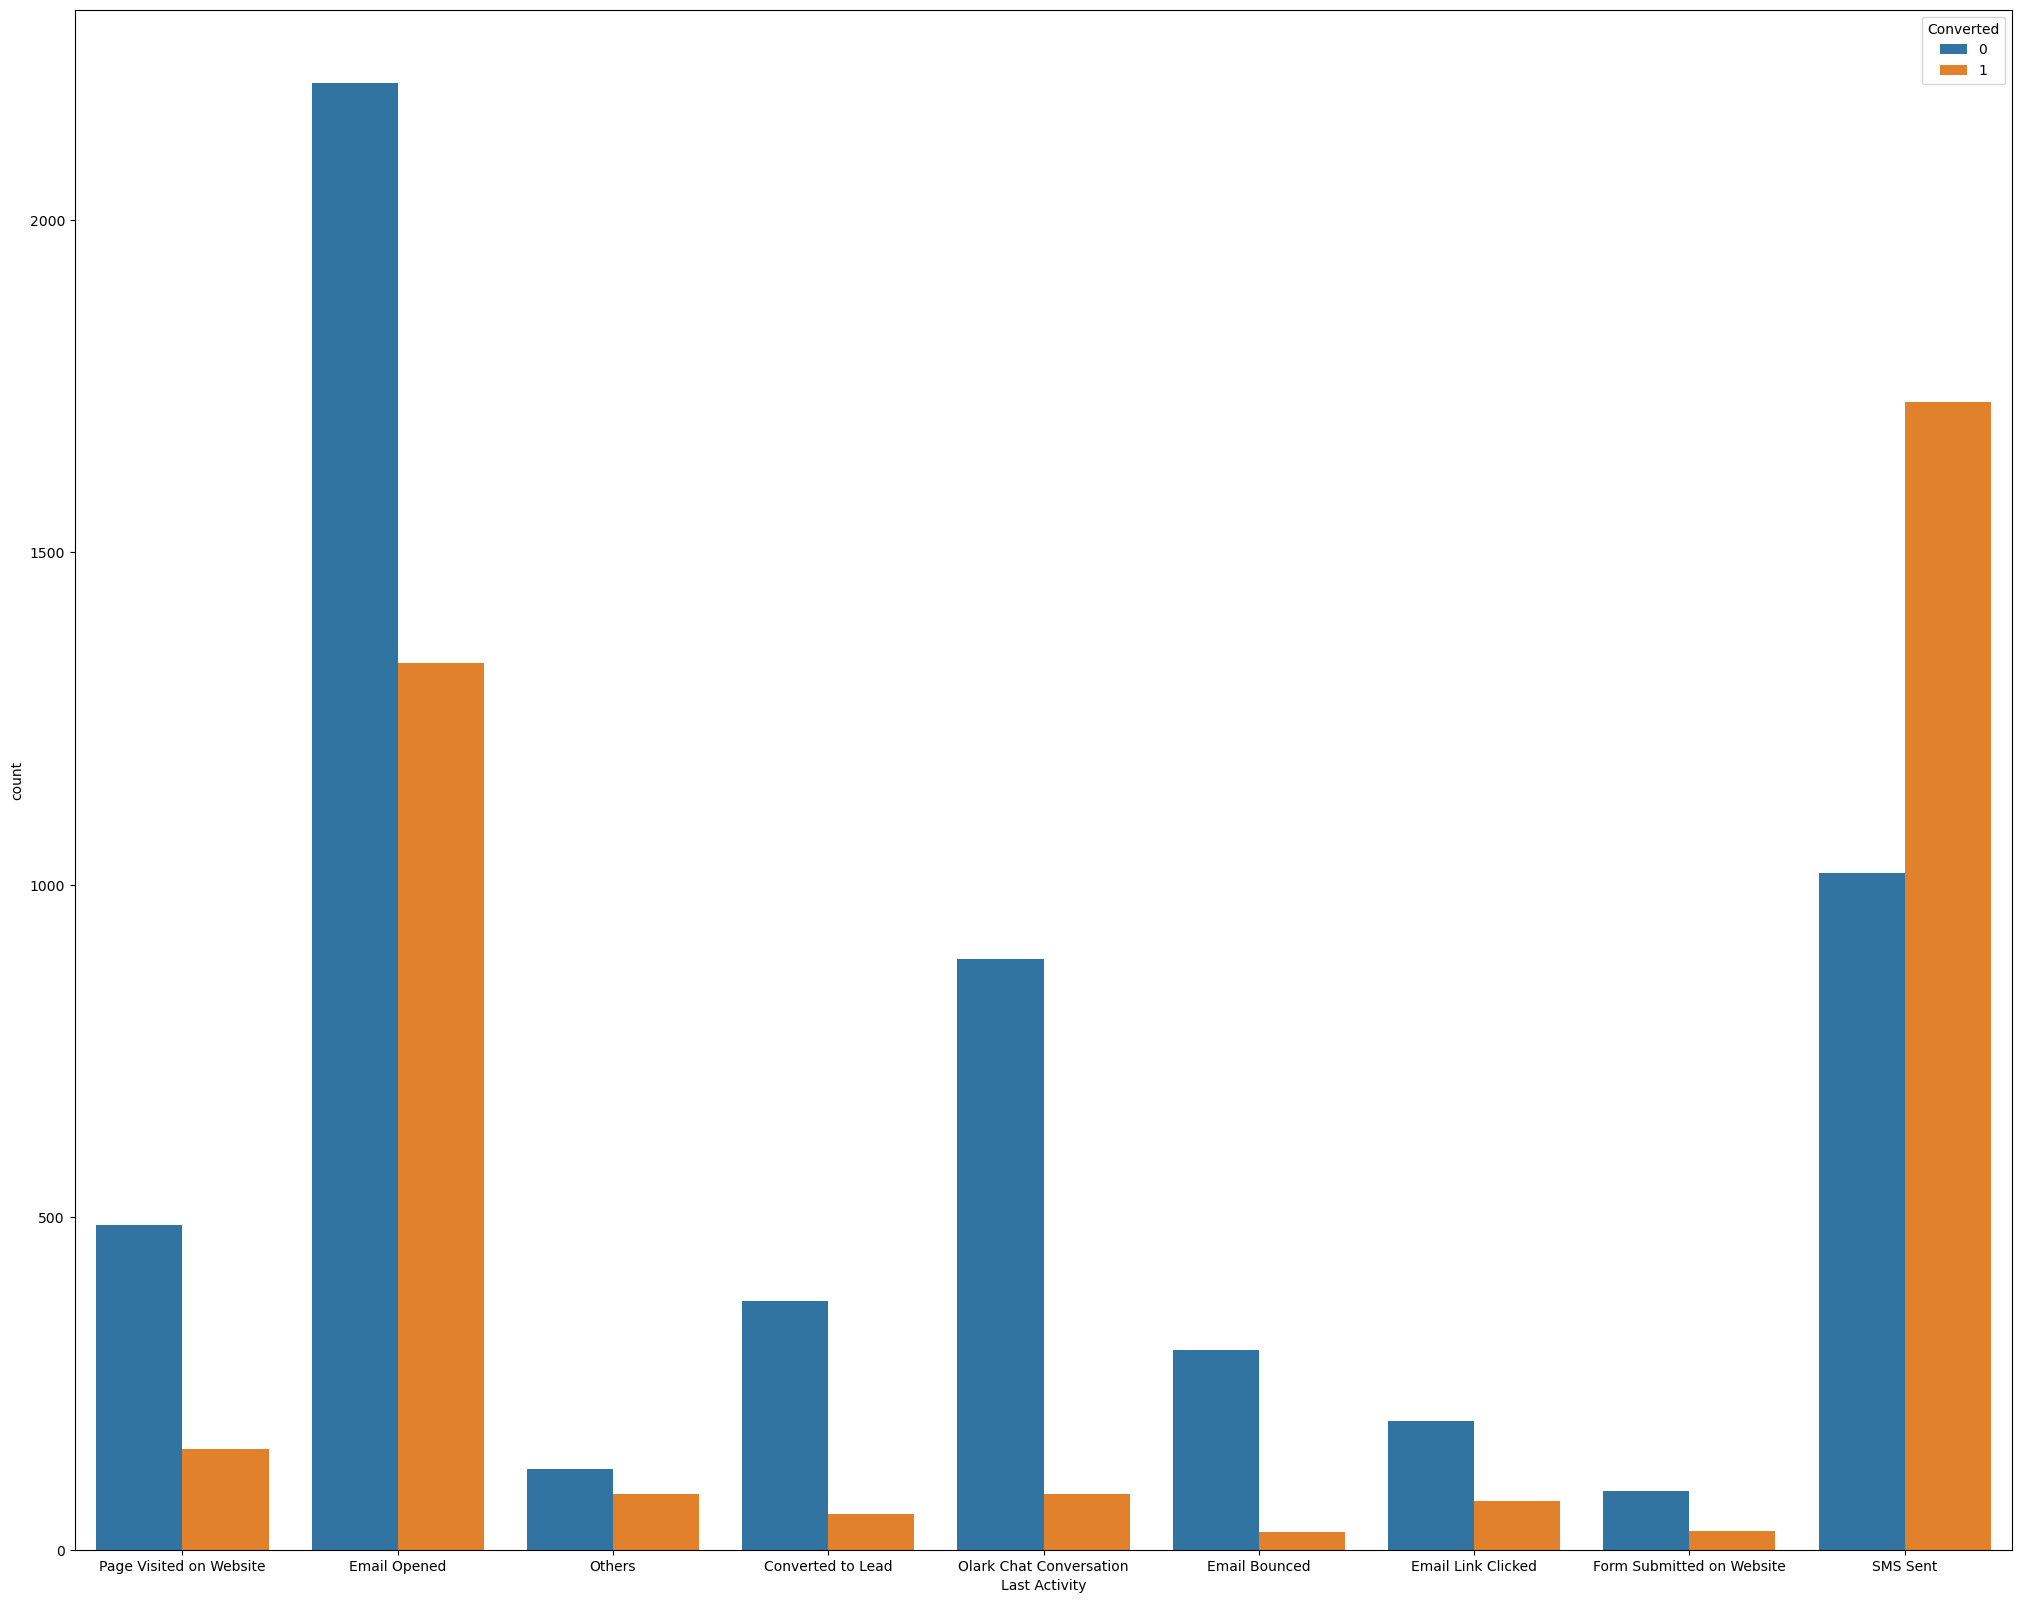

In [75]:
#visualizing count of Variables based on Converted value
plt.figure(figsize=(25,20))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead)


#Interpretation : SMS Sent has very high conversion rate as well as absolute count. However, EMail Opened has high count but low conversion rate

#Column 'Specialization' :

In [76]:
lead['Specialization'].value_counts(normalize=True)

Specialization
Management_Specializations           0.460281
Unknown                              0.365801
Business Administration              0.043615
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
E-COMMERCE                           0.012121
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: proportion, dtype: float64

<Axes: xlabel='Specialization', ylabel='count'>

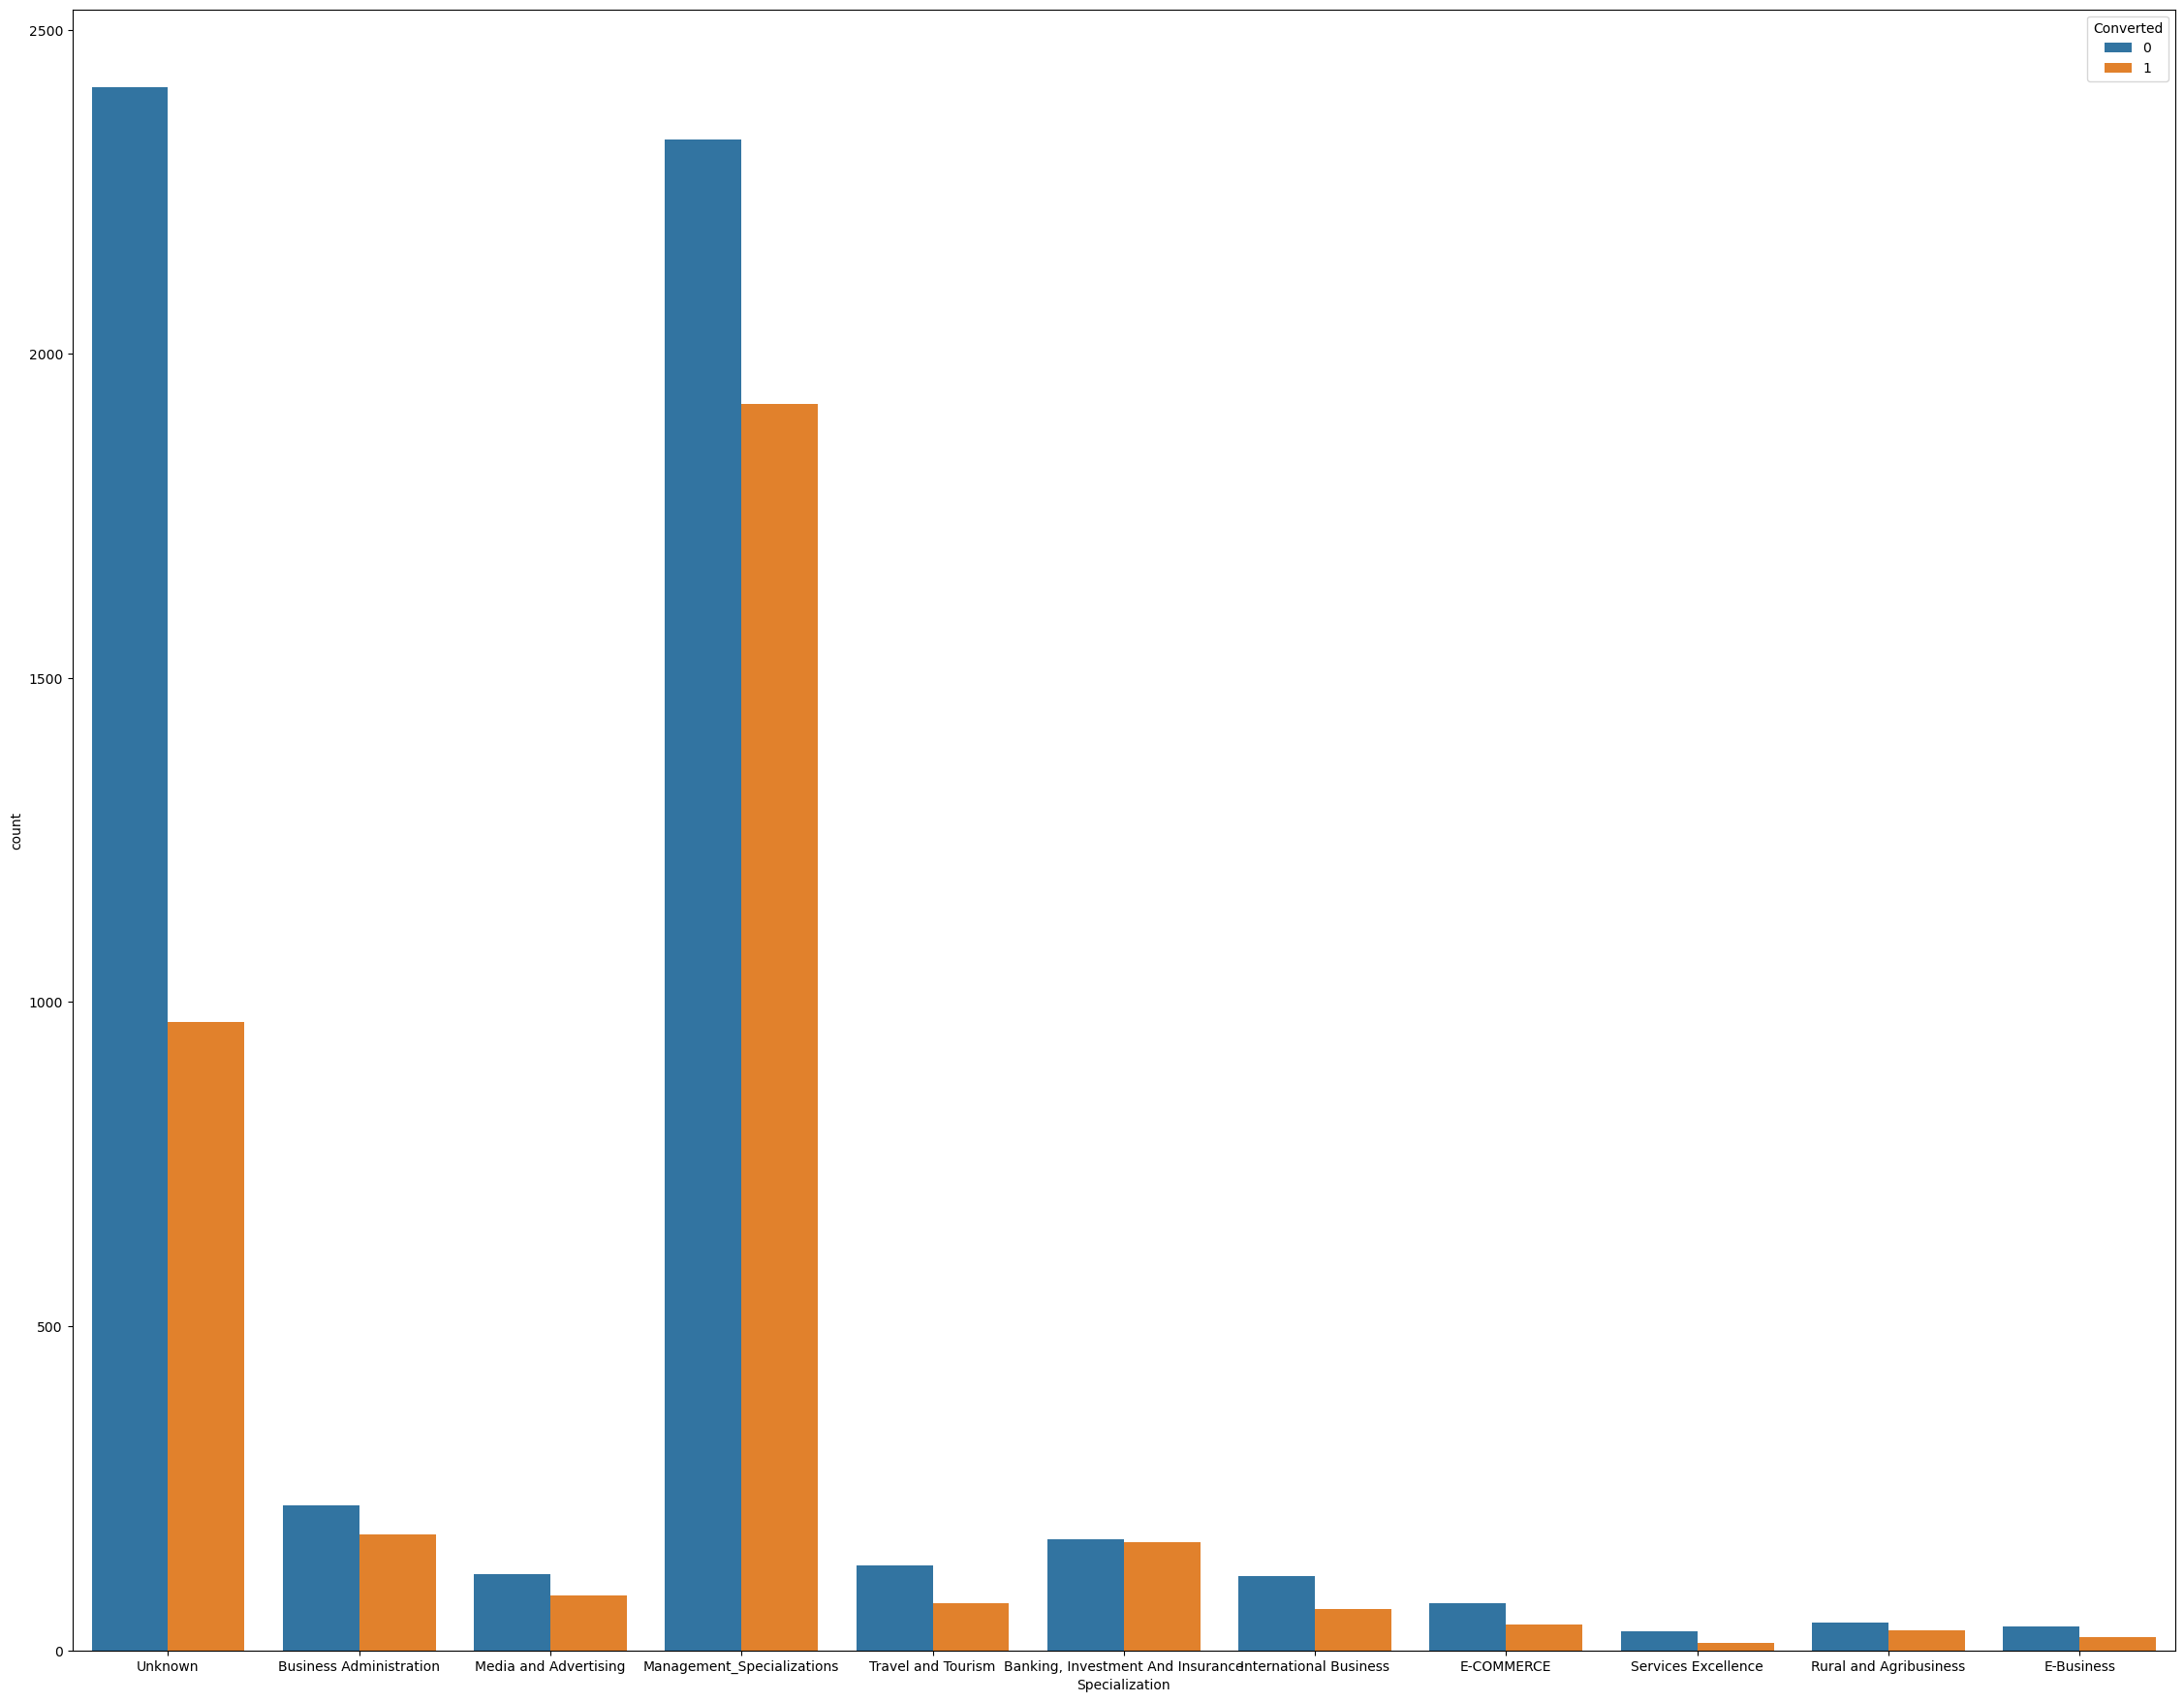

In [77]:
#visualizing count of Variables based on Converted value
plt.figure(figsize=(28,22))
sns.countplot(x = "Specialization",  hue = "Converted", data = lead)


#Interpretation :   Highest conversion rate is for Investment & Insurance specialization followed by Management Speiclisations, Business administration and Rural Agribusiness

#column 'What is your current occupation'


In [78]:
lead['What is your current occupation'].value_counts(normalize=True)

What is your current occupation
Unemployed              0.897186
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: proportion, dtype: float64

<Axes: xlabel='What is your current occupation', ylabel='count'>

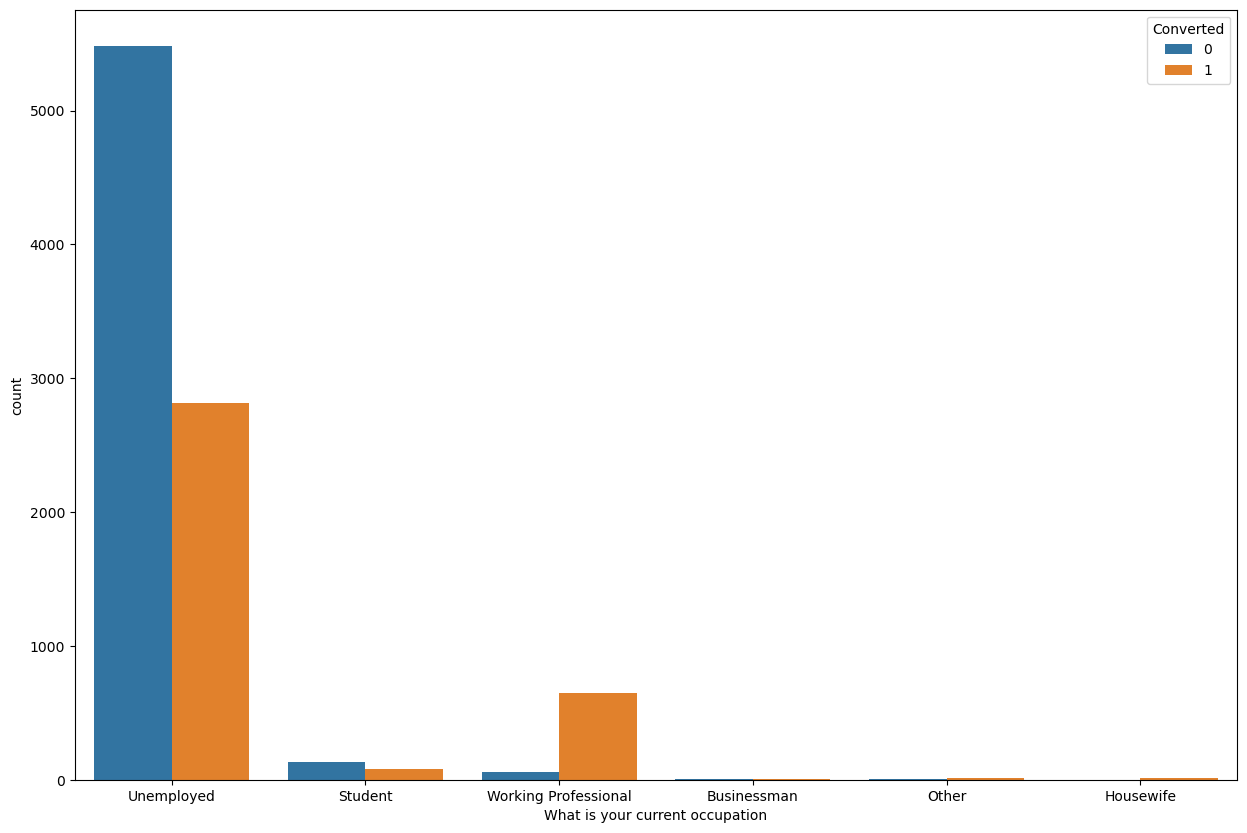

In [79]:
#visualizing count of Variables based on Converted value
plt.figure(figsize=(15,10))
sns.countplot(x = "What is your current occupation",  hue = "Converted", data = lead)


#Interpretation : Working professionals have very high conversion rate

#Column 'What matters most to you in choosing a course'

In [80]:
lead['What matters most to you in choosing a course'].value_counts(normalize=True)

What matters most to you in choosing a course
Better Career Prospects      0.706494
Other                        0.293290
Flexibility & Convenience    0.000216
Name: proportion, dtype: float64

<Axes: xlabel='What matters most to you in choosing a course', ylabel='count'>

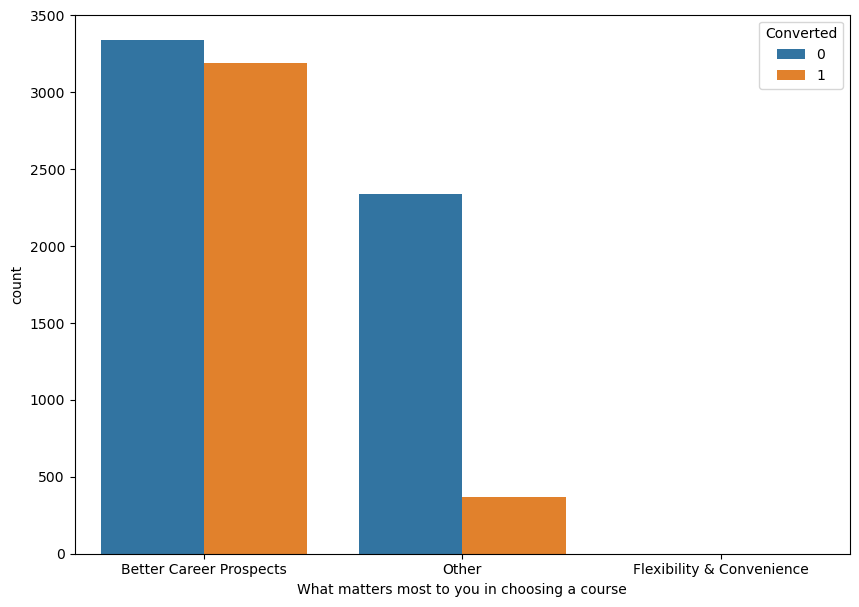

In [81]:
#visualizing count of Variables based on Converted value
plt.figure(figsize=(10,7))
sns.countplot(x = "What matters most to you in choosing a course",  hue = "Converted", data = lead)


In [82]:
#Interpretation : Most of the people wants Better Career Prospects from the chosen course. Thus insignificant with the target variable

In [83]:
#Dropping the column due to insignificane with Target variable : 

lead = lead.drop(['What matters most to you in choosing a course'], axis = 1)

In [84]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Search                                  9240 non-null   obje

In [85]:
#Column 'Search'

In [86]:
lead['Search'].value_counts(normalize=True)

Search
No     0.998485
Yes    0.001515
Name: proportion, dtype: float64

In [87]:
#Column 'Newspaper Article'

In [88]:
lead['Newspaper Article'].value_counts(normalize=True)

Newspaper Article
No     0.999784
Yes    0.000216
Name: proportion, dtype: float64

In [89]:
#Column 'X Education Forums'

In [90]:
lead['X Education Forums'].value_counts(normalize=True)

X Education Forums
No     0.999892
Yes    0.000108
Name: proportion, dtype: float64

In [91]:
#Column 'Newspaper'

In [92]:
lead['Newspaper'].value_counts(normalize=True)

Newspaper
No     0.999892
Yes    0.000108
Name: proportion, dtype: float64

In [93]:
#Column 'Digital Advertisement'

In [94]:
lead['Digital Advertisement'].value_counts(normalize=True)

Digital Advertisement
No     0.999567
Yes    0.000433
Name: proportion, dtype: float64

In [95]:
#Column 'Through Recommendations'

In [96]:
lead['Through Recommendations'].value_counts(normalize=True)

Through Recommendations
No     0.999242
Yes    0.000758
Name: proportion, dtype: float64

#dropping 'Search' , 'Newspaper Article' , 'Through Recommendations' , 'Digital Advertisement' , 'Newspaper'  , 'X Education Forums' due to data imbalance



In [97]:
lead = lead.drop(['Search' , 'Newspaper Article' , 'Through Recommendations' , 'Digital Advertisement' , 'Newspaper'  , 'X Education Forums'], axis = 1)

In [98]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

#Column 'Tags'

In [99]:
lead['Tags'].value_counts(normalize=True)

Tags
Unknown                                0.362879
Will revert after reading the email    0.224242
Other_Tags                             0.149351
Ringing                                0.130195
Interested in other courses            0.055519
Closed by Horizzon                     0.038745
Busy                                   0.020130
Lost to EINS                           0.018939
Name: proportion, dtype: float64

<Axes: xlabel='Tags', ylabel='count'>

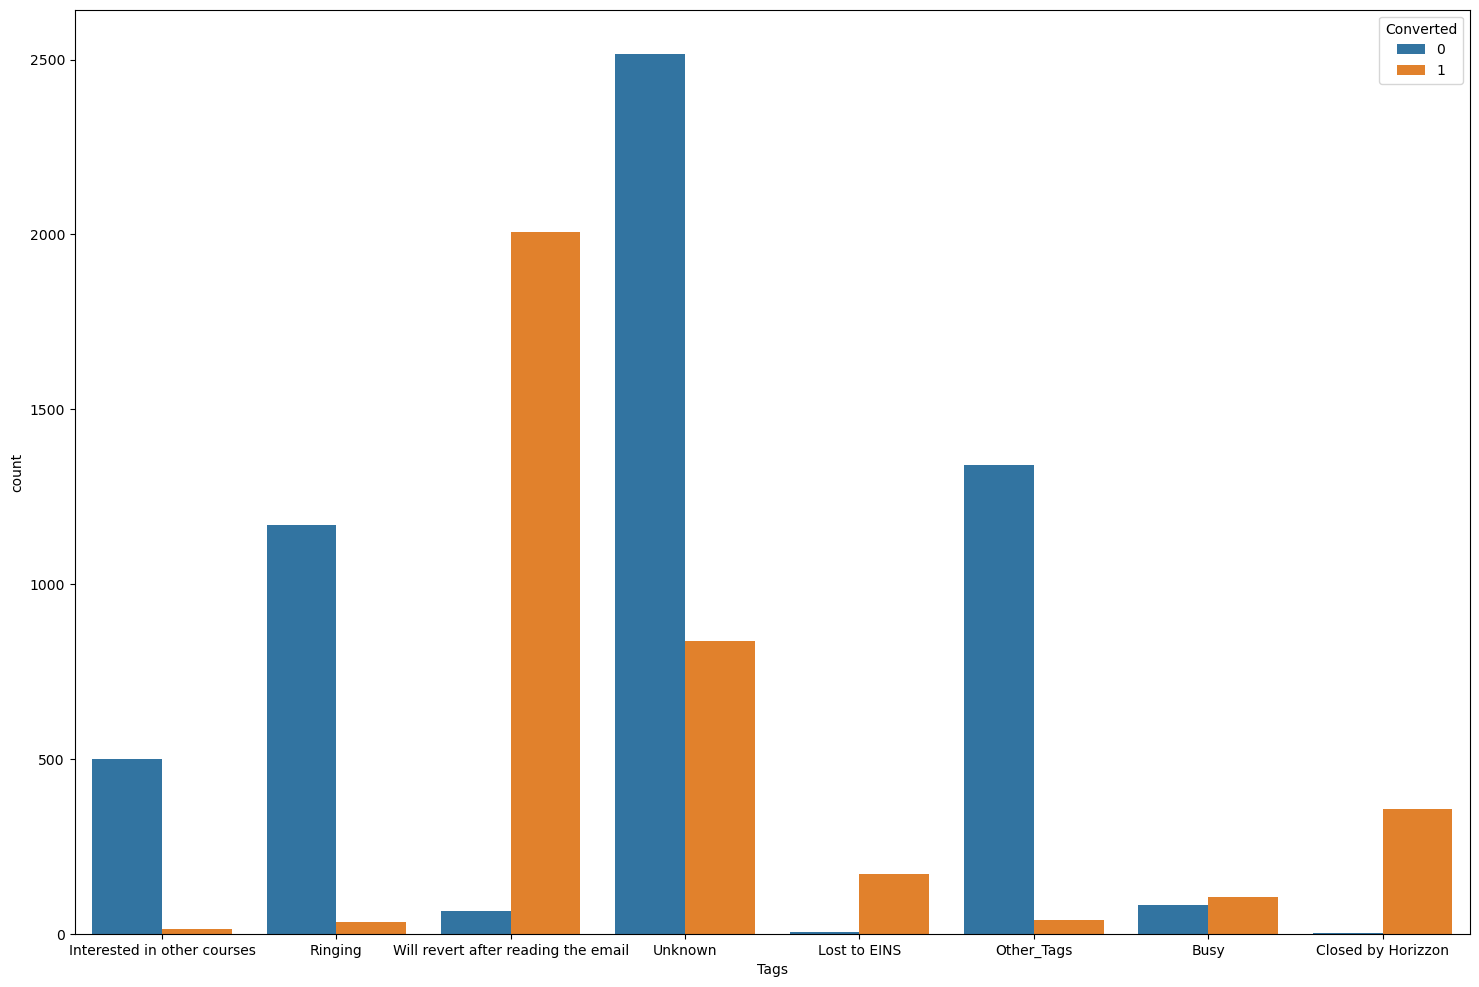

In [100]:
#visualizing count of Variables based on Converted value
plt.figure(figsize=(18,12))
sns.countplot(x = "Tags",  hue = "Converted", data = lead)


#Column 'City'

In [101]:
lead['City'].value_counts(normalize=True)

City
Mumbai                         0.745779
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: proportion, dtype: float64

<Axes: xlabel='City', ylabel='count'>

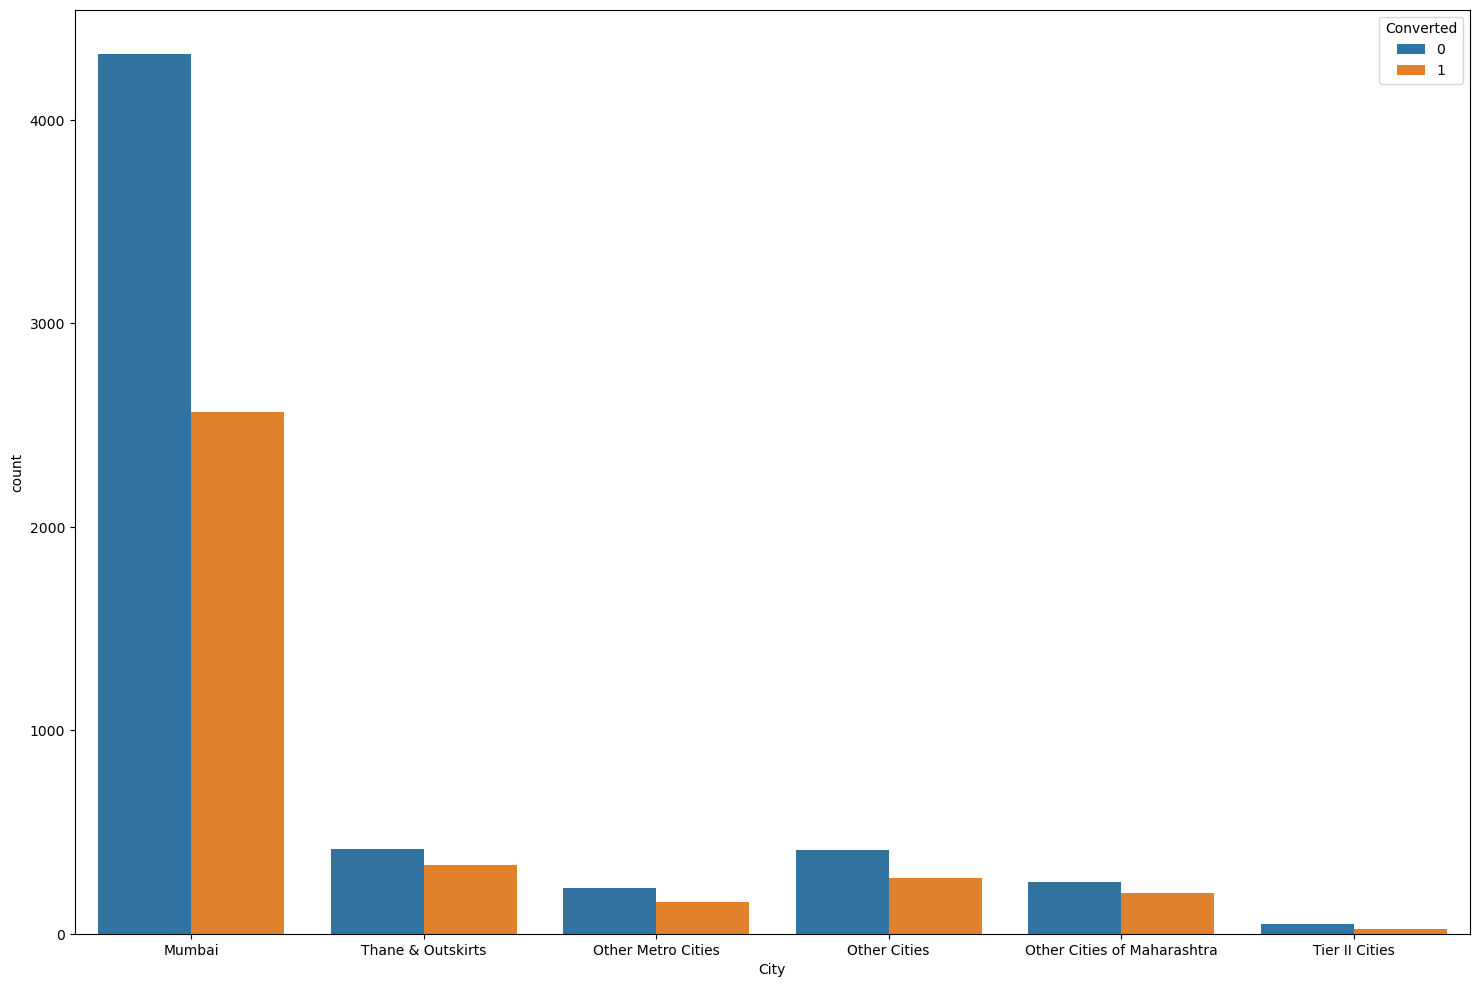

In [102]:
#visualizing count of Variables based on Converted value
plt.figure(figsize=(18,12))
sns.countplot(x = "City",  hue = "Converted", data = lead)


In [103]:
#Column 'A free copy of Mastering The Interview'

In [104]:
lead['A free copy of Mastering The Interview'].value_counts(normalize=True)

A free copy of Mastering The Interview
No     0.687446
Yes    0.312554
Name: proportion, dtype: float64

<Axes: xlabel='A free copy of Mastering The Interview', ylabel='count'>

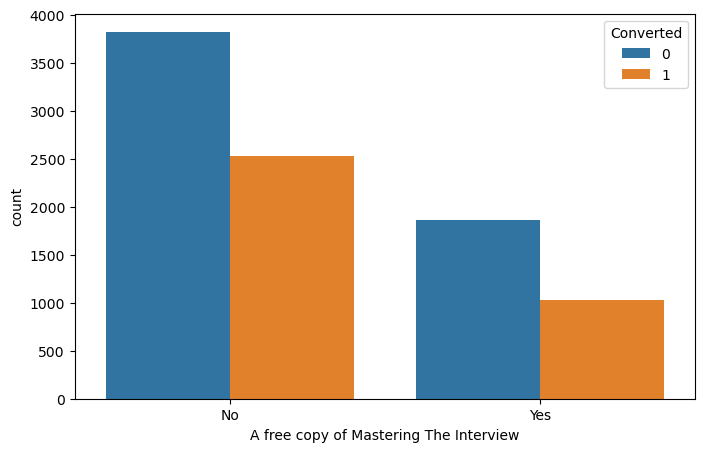

In [105]:
#visualizing count of Variables based on Converted value
plt.figure(figsize=(8,5))
sns.countplot(x = "A free copy of Mastering The Interview",  hue = "Converted", data = lead)


In [106]:
#Column 'Last Notable Activity'

In [107]:
lead['Last Notable Activity'].value_counts(normalize=True)

Last Notable Activity
Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Approached upfront              0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Form Submitted on Website       0.000108
Email Received                  0.000108
Name: proportion, dtype: float64

In [108]:
lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

In [109]:
lead['Last Notable Activity'].value_counts(normalize=True)

Last Notable Activity
Modified                   0.368723
Email Opened               0.305952
SMS Sent                   0.235065
Page Visited on Website    0.034416
Olark Chat Conversation    0.019805
Email Link Clicked         0.018723
Other_Notable_activity     0.017316
Name: proportion, dtype: float64

<Axes: xlabel='Last Notable Activity', ylabel='count'>

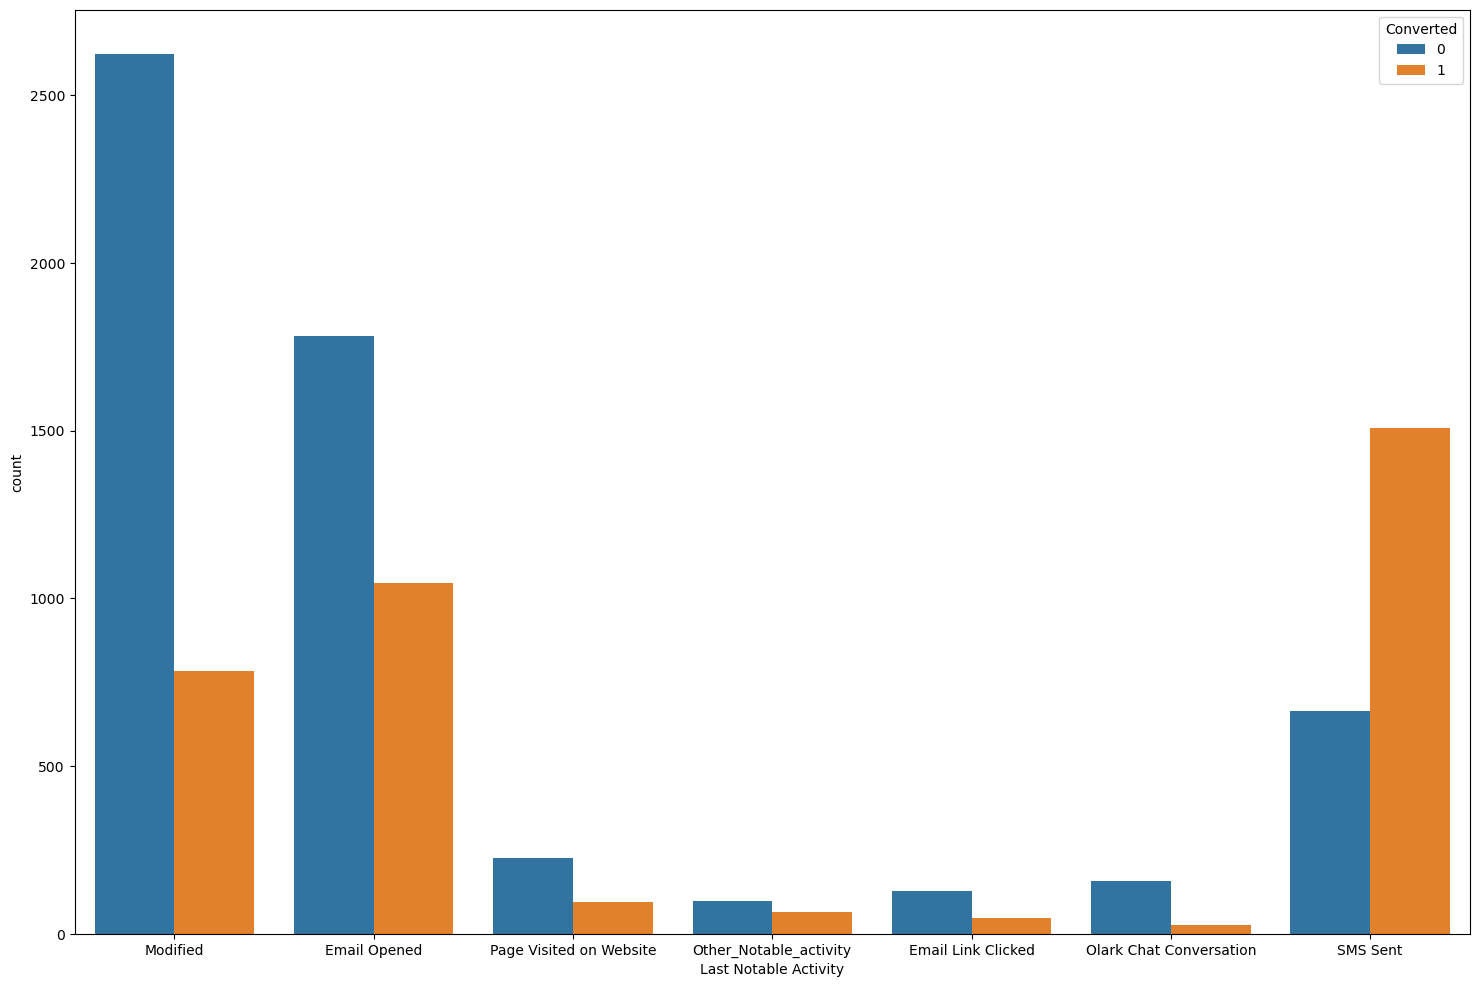

In [110]:
#visualizing count of Variables based on Converted value
plt.figure(figsize=(18,12))
sns.countplot(x = "Last Notable Activity",  hue = "Converted", data = lead)


In [111]:
lead.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


#CHECKING NUMERICAL CONTINUOURS VARIABLES FOR OUTLIERS:

#COLUMN TOTALVISITS :

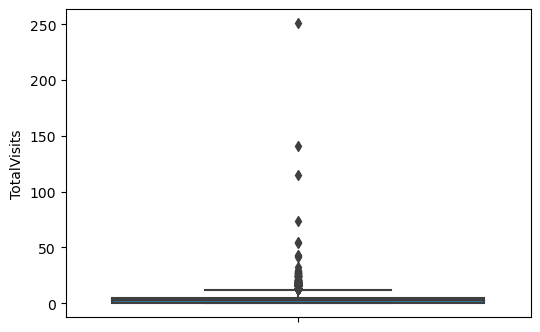

In [112]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=lead['TotalVisits'])
plt.show()

In [113]:
#checking percentile values for "Total Visits"

lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
5%          0.000000
25%         0.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [114]:
# We can see that there are some outliers present so we can treat these outliers before proceeding further

percentiles = lead['TotalVisits'].quantile([0.05,0.95]).values
lead['TotalVisits'][lead['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead['TotalVisits'][lead['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: xlabel='TotalVisits', ylabel='count'>

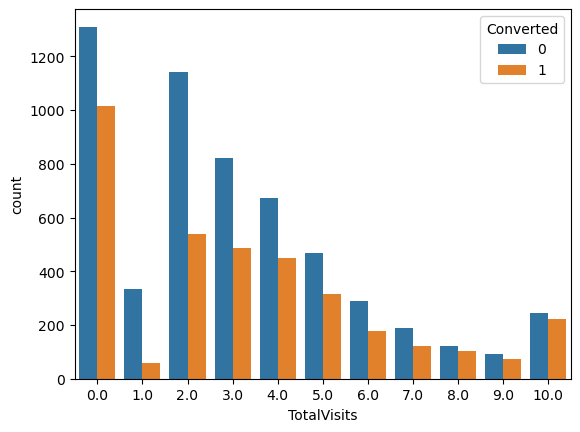

In [115]:
sns.countplot(x = "TotalVisits", hue = "Converted", data = lead)


# This data could mean that when a user visits the website often the ratio of conversion gets better


In [116]:
#COLUMN 'Total Time Spent on Website'

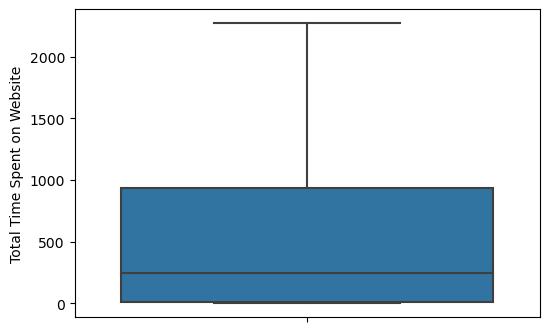

In [117]:
plt.figure(figsize=(6,4))
sns.boxplot(y=lead['Total Time Spent on Website'])
plt.show()

In [118]:
#checking percentiles for "Total Time Spent on Website"

lead['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
5%          0.000000
25%        12.000000
50%       248.000000
75%       936.000000
90%      1380.000000
95%      1562.000000
99%      1840.610000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [119]:
##COLUMN "Page Views Per Visit"

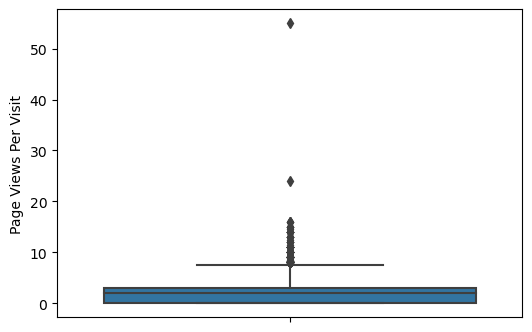

In [120]:
plt.figure(figsize=(6,4))
sns.boxplot(y=lead['Page Views Per Visit'])
plt.show()

In [121]:
#checking percentile values for "Page Views Per Visit"

lead['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        2.327787
std         2.164258
min         0.000000
5%          0.000000
25%         0.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [122]:
# We can see that there are some outliers present so we can treat these outliers before proceeding further

percentiles = lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

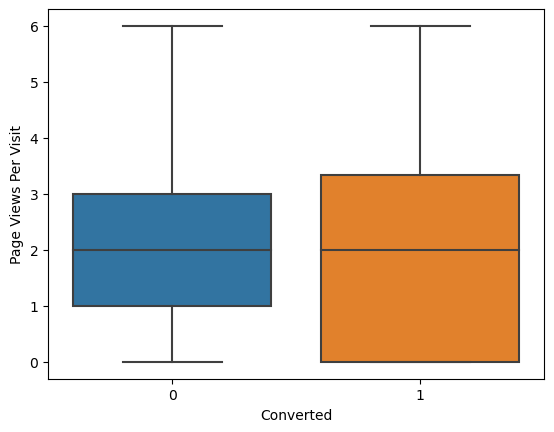

In [123]:
#checking Spread of "Page Views Per Visit" vs Converted variable
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead)
plt.show()


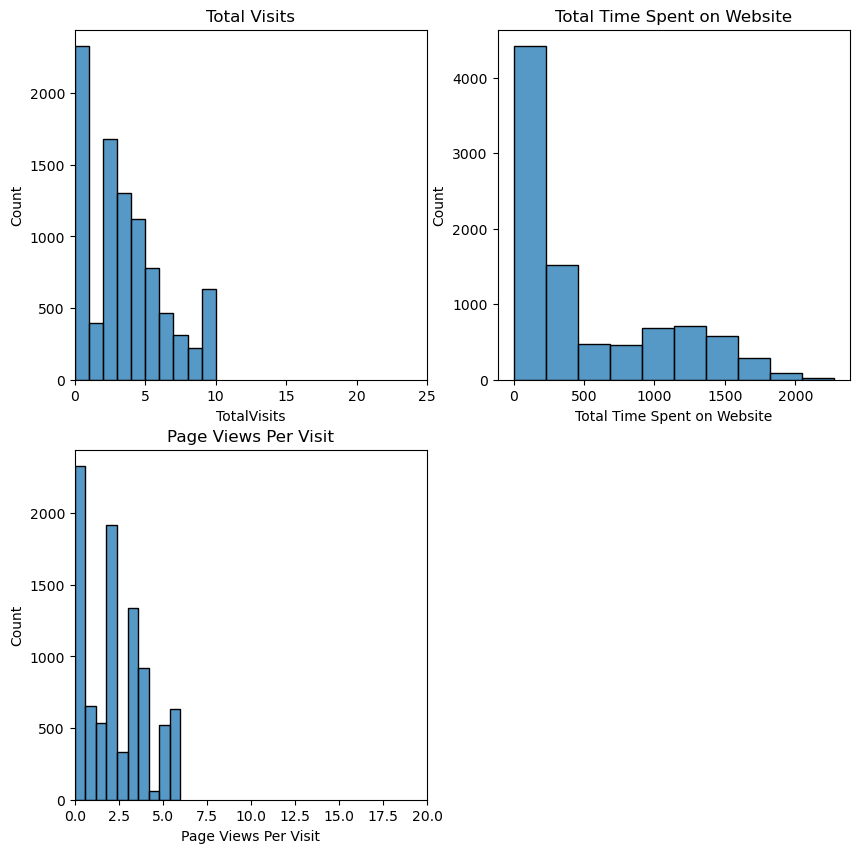

In [124]:
plt.figure(figsize = (10,10))

plt.subplot(221)
sns.histplot(lead['TotalVisits'], bins = 10)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
sns.histplot(lead['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
sns.histplot(lead['Page Views Per Visit'], bins = 10)
plt.title('Page Views Per Visit')
plt.xlim(0,20)

plt.show()

# MULTIVARIATE ANALYSIS

In [125]:
## Numerical variables :

data_numerical = lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]



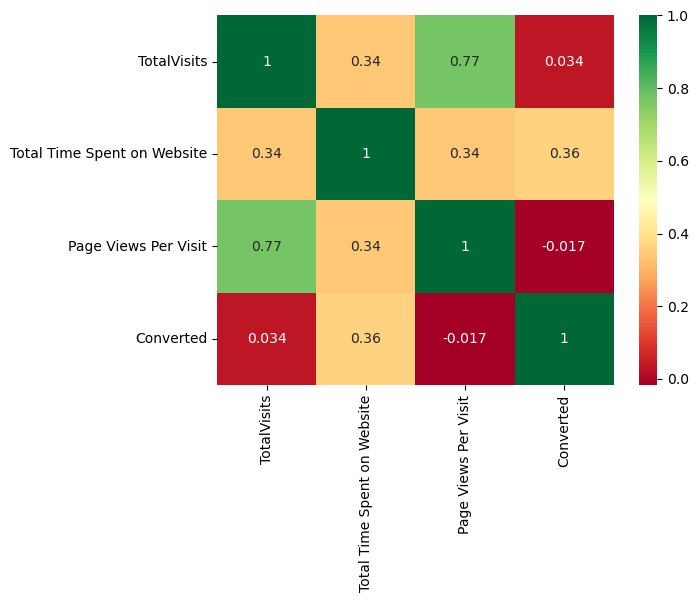

In [126]:
# To check the correlation among variables

sns.heatmap(data_numerical.corr(),cmap = "RdYlGn", annot = True)
plt.show()

#Interpretation :

Strong Correlation (0.77) between Page Views Per Visit & TotalVisits


Good correlation (0.36) between Total time spend on website with Converted variable

In [127]:
lead.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

In [128]:
#checking missing values in leftover columns/

round(100*(lead.isnull().sum()/len(lead.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

# DUMMY VARIABLE CREATION

In [129]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

In [130]:
#getting a list of categorical columns

cat_cols= lead.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [131]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[varlist] = lead[varlist].apply(binary_map)

In [132]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(lead[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads = pd.concat([lead,dummy], axis = 1)

In [133]:
dummy = pd.get_dummies(lead['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Unknown'], axis = 1)
lead = pd.concat([lead, dummy], axis = 1)

In [134]:
dummy = pd.get_dummies(lead['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], axis = 1)
lead = pd.concat([lead, dummy], axis = 1)


In [135]:
dummy = pd.get_dummies(lead['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'],axis = 1)
lead = pd.concat([lead, dummy], axis = 1)


In [136]:
dummy = pd.get_dummies(lead['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], axis = 1)
lead = pd.concat([lead, dummy], axis = 1)


In [137]:
dummy = pd.get_dummies(lead['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Unknown'], axis = 1)
lead = pd.concat([lead, dummy], axis = 1)


In [138]:
#dropping the original columns after dummy variable creation

lead.drop(cat_cols, axis = 1, inplace = True)

In [139]:
pd.set_option('display.max_rows', None)
a = pd.DataFrame(lead.columns)
a

,0
0,Converted
1,TotalVisits
2,Total Time Spent on Website
3,Page Views Per Visit
4,"Specialization_Banking, Investment And Insurance"
5,Specialization_Business Administration
6,Specialization_E-Business
7,Specialization_E-COMMERCE
8,Specialization_International Business
9,Specialization_Management_Specializations


In [140]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0,5.0,674,2.5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1,2.0,1532,2.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,1.0,305,1.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1,2.0,1428,1.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [141]:
lead = lead*1

In [142]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [143]:
lead.shape

(9240, 43)

# TRAIN TEST SPLIT FOR LOGISTIC REGRESSION MODEL

In [144]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = lead['Converted']

y.head()

X=lead.drop('Converted', axis=1)

In [145]:
# Splitting the data in 70 / 30 train test datasets :
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [146]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6468 entries, 1871 to 5640
Data columns (total 42 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   TotalVisits                                       6468 non-null   float64
 1   Total Time Spent on Website                       6468 non-null   int64  
 2   Page Views Per Visit                              6468 non-null   float64
 3   Specialization_Banking, Investment And Insurance  6468 non-null   int32  
 4   Specialization_Business Administration            6468 non-null   int32  
 5   Specialization_E-Business                         6468 non-null   int32  
 6   Specialization_E-COMMERCE                         6468 non-null   int32  
 7   Specialization_International Business             6468 non-null   int32  
 8   Specialization_Management_Specializations         6468 non-null   int32  
 9   Specialization_Media 

#SCALING THE DATA :

In [147]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
1871,-1.121955,-0.885371,-1.234699,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6795,0.313260,0.005716,-0.493295,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0.672063,-0.691418,0.158918,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8105,0.672063,1.365219,1.552535,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3934,-1.121955,-0.885371,-1.234699,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


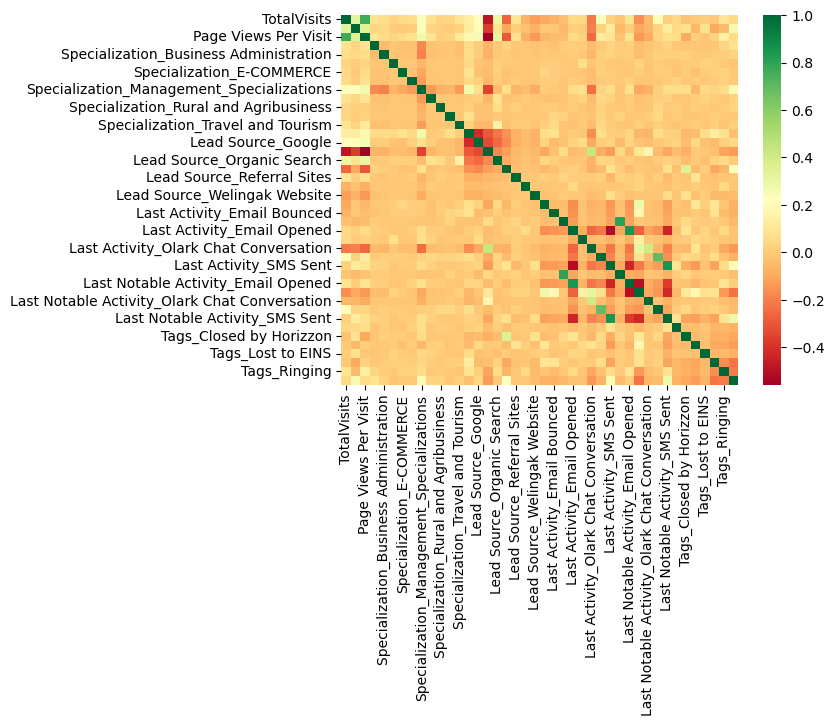

In [148]:
# Check for correlation among variables

sns.heatmap(X_train.corr(),cmap = 'RdYlGn')
plt.show()

# MODEL BUILDING USING STATS MODEL & RFE

In [149]:
import statsmodels.api as sm

In [150]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, step = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [151]:
rfe.support_

array([False,  True, False, False, False, False, False,  True, False,
       False, False, False,  True,  True,  True, False,  True, False,
        True,  True,  True, False,  True, False, False, False, False,
       False,  True,  True, False,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True])

In [152]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Specialization_Banking, Investment And Insurance', False, 3),
 ('Specialization_Business Administration', False, 3),
 ('Specialization_E-Business', False, 2),
 ('Specialization_E-COMMERCE', False, 3),
 ('Specialization_International Business', True, 1),
 ('Specialization_Management_Specializations', False, 3),
 ('Specialization_Media and Advertising', False, 3),
 ('Specialization_Rural and Agribusiness', False, 3),
 ('Specialization_Services Excellence', False, 3),
 ('Specialization_Travel and Tourism', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', False, 3),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 3),
 

In [153]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Specialization_International Business',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [154]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Last Activity_Converted to Lead',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Page Visited on Website', 'Tags_Busy'],
      dtype='object')

In [155]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1280.2
Date:                Mon, 18 Dec 2023   Deviance:                       2560.4
Time:                        23:04:51   Pearson chi2:                 1.20e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6068
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.4446      0.126     -3.540      0.000      -0.691      -0.198
Total Time Spent on Website                       1.0269      0.059     17.479      0.000       0.912       1.142
Specialization_International Business            -0.7855      0.436     -1.800      0.072      -1.641       0.070
Specialization_Travel and Tourism                -1.0699      0.441     -2.425      0.015      -1.934      -0.205
Lead Source_Direct Traffic                       -1.4084      0.166     -8.461      0.000      -1.735      -1.082
Lead Source_Google                               -0.9279      0.151     -6.159      0.000      -1.223      -0.633
Lead Source_Organic Search                       -1.0411      0.195     -5.333      0.000      -1.424      -0.658
Lead Source_Referral Sites                       -0.9518      0.443     -2.146      0.032      -1.821      -0.083
Lead Source_Social Media                         -1.1794      0.728     -1.620      0.105      -2.606       0.247
Lead Source_Welingak Website                      4.3591      0.740      5.888      0.000       2.908       5.810
Last Activity_Email Bounced                      -0.6271      0.411     -1.527      0.127      -1.432       0.178
Last Activity_SMS Sent                            1.4916      0.222      6.710      0.000       1.056       1.927
Last Notable Activity_Email Link Clicked         -1.1768      0.451     -2.610      0.009      -2.061      -0.293
Last Notable Activity_Modified                   -1.4696      0.152     -9.654      0.000      -1.768      -1.171
Last Notable Activity_Olark Chat Conversation    -1.5564      0.423     -3.680      0.000      -2.385      -0.728
Last Notable Activity_SMS Sent                    0.6595      0.256      2.576      0.010       0.158       1.161
Tags_Closed by Horizzon                           7.4908      1.014      7.389      0.000       5.504       9.478
Tags_Interested in other courses                 -1.7762      0.355     -5.006      0.000      -2.472      -1.081
Tags_Lost to EINS                                 6.1282      0.732      8.375      0.000       4.694       7.562
Tags_Other_Tags                                  -2.3954      0.210    -11.424      0.000      -2.806      -1.984
Tags_Ringing                                     -3.5189      0.238    -14.810      0.000      -3.985      -3.053
Tags_Will revert after reading the email          4.5320      0.180     25.160      0.000       4.179       4.885
=================================================================================================================
"""

#p-value of variable Last Activity_Email Bounced is high, so we can drop it.

In [156]:
#dropping column with high p-value

col = col.drop('Last Activity_Email Bounced')

In [157]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1281.5
Date:                Mon, 18 Dec 2023   Deviance:                       2563.0
Time:                        23:04:51   Pearson chi2:                 1.21e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6067
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.4526      0.125     -3.608      0.000      -0.698      -0.207
Total Time Spent on Website                       1.0223      0.059     17.461      0.000       0.908       1.137
Specialization_International Business            -0.8079      0.439     -1.841      0.066      -1.668       0.052
Specialization_Travel and Tourism                -1.0750      0.439     -2.448      0.014      -1.936      -0.214
Lead Source_Direct Traffic                       -1.4166      0.166     -8.523      0.000      -1.742      -1.091
Lead Source_Google                               -0.9296      0.151     -6.167      0.000      -1.225      -0.634
Lead Source_Organic Search                       -1.0419      0.195     -5.344      0.000      -1.424      -0.660
Lead Source_Referral Sites                       -0.9411      0.443     -2.124      0.034      -1.810      -0.073
Lead Source_Social Media                         -1.1772      0.727     -1.619      0.105      -2.602       0.248
Lead Source_Welingak Website                      4.3515      0.741      5.875      0.000       2.900       5.803
Last Activity_SMS Sent                            1.5431      0.220      7.003      0.000       1.111       1.975
Last Notable Activity_Email Link Clicked         -1.1729      0.452     -2.596      0.009      -2.058      -0.287
Last Notable Activity_Modified                   -1.5094      0.150    -10.030      0.000      -1.804      -1.214
Last Notable Activity_Olark Chat Conversation    -1.5493      0.423     -3.663      0.000      -2.378      -0.720
Last Notable Activity_SMS Sent                    0.6187      0.255      2.427      0.015       0.119       1.118
Tags_Closed by Horizzon                           7.5272      1.014      7.423      0.000       5.540       9.515
Tags_Interested in other courses                 -1.7797      0.356     -5.000      0.000      -2.477      -1.082
Tags_Lost to EINS                                 6.1555      0.732      8.411      0.000       4.721       7.590
Tags_Other_Tags                                  -2.3948      0.209    -11.433      0.000      -2.805      -1.984
Tags_Ringing                                     -3.5140      0.237    -14.799      0.000      -3.979      -3.049
Tags_Will revert after reading the email          4.5461      0.180     25.216      0.000       4.193       4.899
=================================================================================================================
"""

#p-value of variable Lead Source_Social Media is high, so we can drop it.

In [158]:
#dropping column with high p-value

col = col.drop('Lead Source_Social Media')

In [159]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1282.9
Date:                Mon, 18 Dec 2023   Deviance:                       2565.8
Time:                        23:04:51   Pearson chi2:                 1.20e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6065
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.4805      0.124     -3.861      0.000      -0.724      -0.237
Total Time Spent on Website                       1.0190      0.059     17.415      0.000       0.904       1.134
Specialization_International Business            -0.8065      0.439     -1.839      0.066      -1.666       0.053
Specialization_Travel and Tourism                -1.0725      0.439     -2.445      0.014      -1.932      -0.213
Lead Source_Direct Traffic                       -1.3852      0.165     -8.389      0.000      -1.709      -1.062
Lead Source_Google                               -0.8984      0.150     -6.006      0.000      -1.192      -0.605
Lead Source_Organic Search                       -1.0110      0.194     -5.210      0.000      -1.391      -0.631
Lead Source_Referral Sites                       -0.9127      0.442     -2.063      0.039      -1.780      -0.046
Lead Source_Welingak Website                      4.3783      0.740      5.914      0.000       2.927       5.829
Last Activity_SMS Sent                            1.5110      0.219      6.886      0.000       1.081       1.941
Last Notable Activity_Email Link Clicked         -1.1612      0.452     -2.569      0.010      -2.047      -0.275
Last Notable Activity_Modified                   -1.5027      0.150     -9.986      0.000      -1.798      -1.208
Last Notable Activity_Olark Chat Conversation    -1.5290      0.423     -3.617      0.000      -2.358      -0.700
Last Notable Activity_SMS Sent                    0.6495      0.254      2.554      0.011       0.151       1.148
Tags_Closed by Horizzon                           7.5348      1.014      7.432      0.000       5.548       9.522
Tags_Interested in other courses                 -1.7780      0.356     -4.999      0.000      -2.475      -1.081
Tags_Lost to EINS                                 6.1557      0.732      8.414      0.000       4.722       7.590
Tags_Other_Tags                                  -2.3917      0.209    -11.423      0.000      -2.802      -1.981
Tags_Ringing                                     -3.5122      0.237    -14.803      0.000      -3.977      -3.047
Tags_Will revert after reading the email          4.5400      0.180     25.223      0.000       4.187       4.893
=================================================================================================================
"""

#p-value of variable Specialization_International Business is high, so we can drop it.

In [160]:
#dropping column with high p-value

col = col.drop('Specialization_International Business')

In [161]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1284.7
Date:                Mon, 18 Dec 2023   Deviance:                       2569.5
Time:                        23:04:51   Pearson chi2:                 1.15e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6063
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.4849      0.124     -3.898      0.000      -0.729      -0.241
Total Time Spent on Website                       1.0194      0.058     17.449      0.000       0.905       1.134
Specialization_Travel and Tourism                -1.0577      0.438     -2.415      0.016      -1.916      -0.199
Lead Source_Direct Traffic                       -1.3958      0.165     -8.466      0.000      -1.719      -1.073
Lead Source_Google                               -0.9174      0.149     -6.141      0.000      -1.210      -0.625
Lead Source_Organic Search                       -1.0227      0.194     -5.275      0.000      -1.403      -0.643
Lead Source_Referral Sites                       -0.9130      0.443     -2.061      0.039      -1.781      -0.045
Lead Source_Welingak Website                      4.3801      0.740      5.916      0.000       2.929       5.831
Last Activity_SMS Sent                            1.5115      0.219      6.899      0.000       1.082       1.941
Last Notable Activity_Email Link Clicked         -1.1670      0.450     -2.595      0.009      -2.049      -0.286
Last Notable Activity_Modified                   -1.4953      0.150     -9.946      0.000      -1.790      -1.201
Last Notable Activity_Olark Chat Conversation    -1.5197      0.422     -3.598      0.000      -2.348      -0.692
Last Notable Activity_SMS Sent                    0.6495      0.254      2.558      0.011       0.152       1.147
Tags_Closed by Horizzon                           7.4830      1.011      7.401      0.000       5.501       9.465
Tags_Interested in other courses                 -1.7715      0.355     -4.986      0.000      -2.468      -1.075
Tags_Lost to EINS                                 6.1637      0.732      8.424      0.000       4.730       7.598
Tags_Other_Tags                                  -2.3957      0.209    -11.454      0.000      -2.806      -1.986
Tags_Ringing                                     -3.5073      0.237    -14.789      0.000      -3.972      -3.042
Tags_Will revert after reading the email          4.5350      0.180     25.201      0.000       4.182       4.888
=================================================================================================================
"""

#p-value of variable Lead Source_Referral Sites is high, so we can drop it.

In [162]:
#dropping column with high p-value

col = col.drop('Lead Source_Referral Sites')

In [163]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1287.1
Date:                Mon, 18 Dec 2023   Deviance:                       2574.2
Time:                        23:04:51   Pearson chi2:                 1.15e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6060
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.5530      0.121     -4.580      0.000      -0.790      -0.316
Total Time Spent on Website                       1.0041      0.058     17.339      0.000       0.891       1.118
Specialization_Travel and Tourism                -1.0656      0.435     -2.447      0.014      -1.919      -0.212
Lead Source_Direct Traffic                       -1.3258      0.162     -8.207      0.000      -1.642      -1.009
Lead Source_Google                               -0.8454      0.146     -5.806      0.000      -1.131      -0.560
Lead Source_Organic Search                       -0.9510      0.191     -4.982      0.000      -1.325      -0.577
Lead Source_Welingak Website                      4.4344      0.740      5.992      0.000       2.984       5.885
Last Activity_SMS Sent                            1.5115      0.219      6.908      0.000       1.083       1.940
Last Notable Activity_Email Link Clicked         -1.1937      0.450     -2.653      0.008      -2.076      -0.312
Last Notable Activity_Modified                   -1.4864      0.150     -9.884      0.000      -1.781      -1.192
Last Notable Activity_Olark Chat Conversation    -1.4696      0.422     -3.486      0.000      -2.296      -0.643
Last Notable Activity_SMS Sent                    0.6594      0.254      2.601      0.009       0.162       1.156
Tags_Closed by Horizzon                           7.5100      1.011      7.429      0.000       5.529       9.491
Tags_Interested in other courses                 -1.8520      0.359     -5.164      0.000      -2.555      -1.149
Tags_Lost to EINS                                 6.1698      0.731      8.437      0.000       4.736       7.603
Tags_Other_Tags                                  -2.3971      0.209    -11.471      0.000      -2.807      -1.988
Tags_Ringing                                     -3.5019      0.237    -14.787      0.000      -3.966      -3.038
Tags_Will revert after reading the email          4.5338      0.180     25.235      0.000       4.182       4.886
=================================================================================================================
"""

#p-value of variable Specialization_Travel and Tourism is high, so we can drop it.

In [164]:
#dropping column with high p-value

col = col.drop('Specialization_Travel and Tourism')

In [165]:
#BUILDING MODEL #6

X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1290.2
Date:                Mon, 18 Dec 2023   Deviance:                       2580.4
Time:                        23:04:51   Pearson chi2:                 1.14e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6056
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.5515      0.121     -4.575      0.000      -0.788      -0.315
Total Time Spent on Website                       1.0045      0.058     17.374      0.000       0.891       1.118
Lead Source_Direct Traffic                       -1.3541      0.161     -8.404      0.000      -1.670      -1.038
Lead Source_Google                               -0.8467      0.145     -5.828      0.000      -1.131      -0.562
Lead Source_Organic Search                       -0.9993      0.190     -5.269      0.000      -1.371      -0.628
Lead Source_Welingak Website                      4.4377      0.740      5.997      0.000       2.987       5.888
Last Activity_SMS Sent                            1.5122      0.218      6.932      0.000       1.085       1.940
Last Notable Activity_Email Link Clicked         -1.1811      0.448     -2.637      0.008      -2.059      -0.303
Last Notable Activity_Modified                   -1.4955      0.150     -9.957      0.000      -1.790      -1.201
Last Notable Activity_Olark Chat Conversation    -1.4664      0.421     -3.482      0.000      -2.292      -0.641
Last Notable Activity_SMS Sent                    0.6461      0.253      2.556      0.011       0.151       1.142
Tags_Closed by Horizzon                           7.5081      1.011      7.425      0.000       5.526       9.490
Tags_Interested in other courses                 -1.8505      0.358     -5.169      0.000      -2.552      -1.149
Tags_Lost to EINS                                 6.1861      0.732      8.456      0.000       4.752       7.620
Tags_Other_Tags                                  -2.3878      0.208    -11.457      0.000      -2.796      -1.979
Tags_Ringing                                     -3.4798      0.236    -14.728      0.000      -3.943      -3.017
Tags_Will revert after reading the email          4.5132      0.179     25.256      0.000       4.163       4.863
=================================================================================================================
"""

#p-value of variable Last Notable Activity_SMS Sent is high, so we can drop it.

In [166]:
#dropping column with high p-value

col = col.drop('Last Notable Activity_SMS Sent')

In [167]:
#BUILDING MODEL #7

X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1293.5
Date:                Mon, 18 Dec 2023   Deviance:                       2587.0
Time:                        23:04:51   Pearson chi2:                 1.15e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6052
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.4793      0.116     -4.117      0.000      -0.707      -0.251
Total Time Spent on Website                       1.0031      0.058     17.407      0.000       0.890       1.116
Lead Source_Direct Traffic                       -1.3786      0.160     -8.597      0.000      -1.693      -1.064
Lead Source_Google                               -0.8752      0.144     -6.063      0.000      -1.158      -0.592
Lead Source_Organic Search                       -1.0113      0.188     -5.370      0.000      -1.380      -0.642
Lead Source_Welingak Website                      4.4329      0.743      5.969      0.000       2.977       5.889
Last Activity_SMS Sent                            1.9885      0.113     17.588      0.000       1.767       2.210
Last Notable Activity_Email Link Clicked         -1.2625      0.450     -2.804      0.005      -2.145      -0.380
Last Notable Activity_Modified                   -1.7329      0.122    -14.147      0.000      -1.973      -1.493
Last Notable Activity_Olark Chat Conversation    -1.5389      0.421     -3.655      0.000      -2.364      -0.714
Tags_Closed by Horizzon                           7.6254      1.011      7.540      0.000       5.643       9.608
Tags_Interested in other courses                 -1.8145      0.358     -5.067      0.000      -2.516      -1.113
Tags_Lost to EINS                                 6.2896      0.733      8.581      0.000       4.853       7.726
Tags_Other_Tags                                  -2.3495      0.206    -11.386      0.000      -2.754      -1.945
Tags_Ringing                                     -3.3980      0.232    -14.640      0.000      -3.853      -2.943
Tags_Will revert after reading the email          4.5697      0.180     25.335      0.000       4.216       4.923
=================================================================================================================
"""

#p-value of variable Last Notable Activity_Email Link Clicked is high, so we can drop it.

In [168]:
#dropping column with high p-value

col = col.drop('Last Notable Activity_Email Link Clicked')

In [169]:
#BUILDING MODEL #8

X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1298.2
Date:                Mon, 18 Dec 2023   Deviance:                       2596.3
Time:                        23:04:51   Pearson chi2:                 1.15e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6046
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.5405      0.115     -4.720      0.000      -0.765      -0.316
Total Time Spent on Website                       1.0060      0.058     17.473      0.000       0.893       1.119
Lead Source_Direct Traffic                       -1.3568      0.160     -8.486      0.000      -1.670      -1.043
Lead Source_Google                               -0.8515      0.144     -5.917      0.000      -1.133      -0.569
Lead Source_Organic Search                       -0.9921      0.188     -5.272      0.000      -1.361      -0.623
Lead Source_Welingak Website                      4.4188      0.741      5.961      0.000       2.966       5.872
Last Activity_SMS Sent                            2.0221      0.113     17.956      0.000       1.801       2.243
Last Notable Activity_Modified                   -1.6988      0.122    -13.926      0.000      -1.938      -1.460
Last Notable Activity_Olark Chat Conversation    -1.4830      0.421     -3.523      0.000      -2.308      -0.658
Tags_Closed by Horizzon                           7.6086      1.012      7.521      0.000       5.626       9.591
Tags_Interested in other courses                 -1.8068      0.358     -5.050      0.000      -2.508      -1.106
Tags_Lost to EINS                                 6.2648      0.733      8.549      0.000       4.829       7.701
Tags_Other_Tags                                  -2.3416      0.206    -11.354      0.000      -2.746      -1.937
Tags_Ringing                                     -3.3917      0.232    -14.608      0.000      -3.847      -2.937
Tags_Will revert after reading the email          4.5634      0.180     25.364      0.000       4.211       4.916
=================================================================================================================
"""

#Now that all the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [170]:
# Check for the VIF values of the feature variables. 


from statsmodels.stats.outliers_influence import variance_inflation_factor

In [171]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Google,1.71
1,Lead Source_Direct Traffic,1.68
6,Last Notable Activity_Modified,1.54
5,Last Activity_SMS Sent,1.53
13,Tags_Will revert after reading the email,1.49
11,Tags_Other_Tags,1.40
12,Tags_Ringing,1.35
3,Lead Source_Organic Search,1.29
0,Total Time Spent on Website,1.21
9,Tags_Interested in other courses,1.17


#All the VIF Values all seem to be below the threshold thus now let us derive the Probabilities, Lead Score, Predictions on Train Data:

In [172]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.007980
6795    0.131069
3516    0.009683
8105    0.199705
3934    0.041886
4844    0.998589
3297    0.003476
8071    0.993978
987     0.163852
7423    0.999239
dtype: float64

In [173]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00797992, 0.13106939, 0.00968254, 0.19970483, 0.04188635,
       0.99858928, 0.00347573, 0.99397758, 0.16385244, 0.99923881])

In [174]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.007980,1871
1,0,0.131069,6795
2,0,0.009683,3516
3,0,0.199705,8105
4,0,0.041886,3934


In [175]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.007980,1871,0
1,0,0.131069,6795,0
2,0,0.009683,3516,0
3,0,0.199705,8105,0
4,0,0.041886,3934,0


In [176]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3837  165]
 [ 299 2167]]


In [177]:
# Let us now check the overall accuracy of the model created


print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9282622139764997


In [178]:
# Confusion Matrix 

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [179]:
# Let's see the sensitivity of our logistic regression model


TP / float(TP+FN)

0.8787510137875101

In [180]:
# Let us calculate specificity


TN / float(TN+FP)

0.9587706146926537

In [181]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert


print(FP/ float(TN+FP))

0.04122938530734633


In [182]:
# positive predictive value 


print (TP / float(TP+FP))

0.9292452830188679


In [183]:
# Negative predictive value


print (TN / float(TN+ FN))

0.9277079303675049


#Lets plot the ROC Curve

In [184]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [185]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

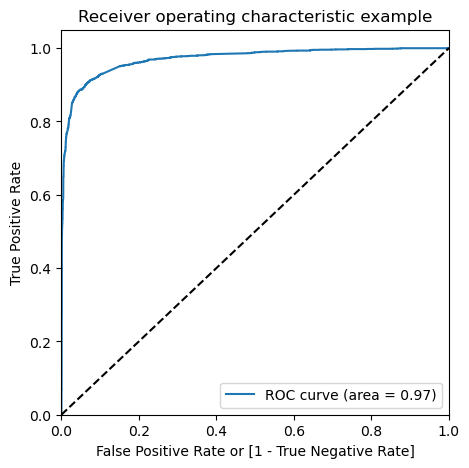

In [186]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

#OPTIMAL CUT OFF POINT

In [187]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.007980,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.131069,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.009683,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.199705,8105,0,1,1,0,0,0,0,0,0,0,0
4,0,0.041886,3934,0,1,0,0,0,0,0,0,0,0,0


In [188]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.828386  0.971614  0.740130
0.2   0.2  0.909709  0.929440  0.897551
0.3   0.3  0.920068  0.909165  0.926787
0.4   0.4  0.922696  0.894566  0.940030
0.5   0.5  0.928262  0.878751  0.958771
0.6   0.6  0.926407  0.856448  0.969515
0.7   0.7  0.913420  0.804947  0.980260
0.8   0.8  0.905071  0.776967  0.984008
0.9   0.9  0.886673  0.718978  0.990005


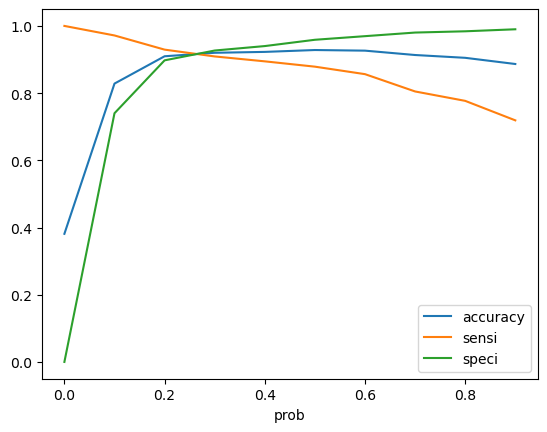

In [189]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [190]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.007980,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.131069,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.009683,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.199705,8105,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.041886,3934,0,1,0,0,0,0,0,0,0,0,0,0


In [191]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.007980,1871,0,1
1,0,0.131069,6795,0,13
2,0,0.009683,3516,0,1
3,0,0.199705,8105,0,20
4,0,0.041886,3934,0,4


In [192]:
# Let's check the overall accuracy.


metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9200680272108843

In [193]:
confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion_2

array([[3709,  293],
       [ 224, 2242]], dtype=int64)

In [194]:
# Confusion Matrix 

TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [195]:
# Let's see the sensitivity of our logistic regression model


TP / float(TP+FN)

0.9091646390916464

In [196]:
# Let us calculate specificity

TN / float(TN+FP)

0.9267866066966517

# Observation:


As per the above model evaluation methods, the model seems to be working well.


The ROC curve has a value of 0.97, which is very good.


The following are the model performance mesures for the Train Data:


Accuracy : 92.01%

Sensitivity : 90.92%

Specificity : 92.68%

In [197]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert

print(FP/ float(TN+FP))

0.07321339330334832


In [198]:
# Positive predictive value 

print (TP / float(TP+FP))

0.8844181459566075


In [199]:
# Negative predictive value

print (TN / float(TN+ FN))

0.9430460208492245


In [200]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3709,  293],
       [ 224, 2242]], dtype=int64)

In [201]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8844181459566075

In [202]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9091646390916464

In [203]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)


0.8844181459566075

In [204]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9091646390916464

In [205]:
from sklearn.metrics import precision_recall_curve

In [206]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

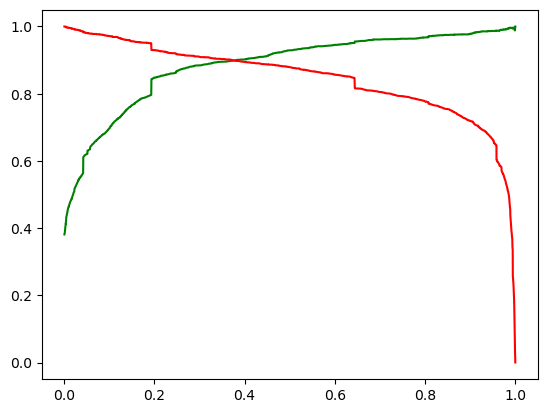

In [207]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [208]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
4269,1.737951,0.933036,2.067597,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2376,-1.130522,-0.900812,-1.240584,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7766,0.662274,-0.793792,1.516234,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9199,-1.130522,-0.900812,-1.240584,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4359,-1.130522,-0.900812,-1.240584,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [209]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
4269,0.933036,1,0,0,0,1,0,0,0,0,0,0,0,0
2376,-0.900812,0,0,0,0,1,0,0,0,0,0,0,0,1
7766,-0.793792,0,1,0,0,0,0,0,0,0,0,0,0,1
9199,-0.900812,0,0,0,0,0,1,0,0,0,0,1,0,0
4359,-0.900812,0,0,0,0,0,0,0,0,0,0,0,0,1


In [210]:
X_test_sm = sm.add_constant(X_test)

# PREDICTIONS ON THE TEST SET

In [211]:
y_test_pred = res.predict(X_test_sm)

In [212]:
y_test_pred[:10]

4269    0.743340
2376    0.994169
7766    0.914738
9199    0.004123
4359    0.957577
9186    0.995522
1631    0.983916
8963    0.940155
8007    0.033270
5324    0.989842
dtype: float64

In [213]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [214]:
y_pred_1.head()

,0
4269,0.743340
2376,0.994169
7766,0.914738
9199,0.004123
4359,0.957577


In [215]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [216]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [217]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [218]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [219]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.743340
1,1,2376,0.994169
2,1,7766,0.914738
3,0,9199,0.004123
4,1,4359,0.957577


In [220]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [221]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4269,0.743340
1,1,2376,0.994169
2,1,7766,0.914738
3,0,9199,0.004123
4,1,4359,0.957577


In [222]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [223]:

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4269,1,0.743340,74
1,2376,1,0.994169,99
2,7766,1,0.914738,91
3,9199,0,0.004123,0
4,4359,1,0.957577,96


In [224]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [225]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1,0.743340,74,1
1,2376,1,0.994169,99,1
2,7766,1,0.914738,91,1
3,9199,0,0.004123,0,0
4,4359,1,0.957577,96,1


In [226]:
# Let's check the overall accuracy.


metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9238816738816739

In [227]:
confusion_2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion_2

array([[1546,  131],
       [  80, 1015]], dtype=int64)

In [228]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [229]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9269406392694064

In [230]:
# Let us calculate specificity


TN / float(TN+FP)

0.9218843172331544

In [231]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8856893542757417

In [232]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9269406392694064

# Observation:
    

The following are the model performance mesures for the Test Data:

Accuracy : 92.39%

Sensitivity : 92.69%

Specificity : 92.19%

# Final Observation

Train Set:


Accuracy : 92.01%

Sensitivity : 90.92%

Specificity : 92.68%




Test Set:

Accuracy : 92.39%

Sensitivity : 92.69%

Specificity : 92.19%

The Model predicts the conversion rate very well and thus can be shared with the business team for decision making.